# COGS 108 Final Project - Waitz Library Traffic


## Introduction and Background

As students at UC San Diego we are presented with some obstacles in our weekly responsibility to study and concentrate towards our schoolwork. We have collectively run into anecdotal evidence that a major obstacle for the average UC San Diego student is finding an optimal place to study. Students often need a place to study or work and naturally head to Geisel Library only to find that space is not immediately available and that it may take a substantial chunk of time just to find a chair to sit on. This problem can directly impact a student’s time management, cut down study time and deteriorate their ability to thrive.
    
This obstacle is already being tackled by Geisel Library and companies like Waitz. Geisel Library has created a medium on their website that allows students to book group study rooms and to view which study rooms are currently occupied. This effort mitigates the obstacle of finding a study space for student groups if they are able to reserve a room well in advance. However, this solution does not meet the needs of the average student. It lacks the needed flexibility, on-the-run foresight, and only covers a small fraction of Geisel Library. 

In a further attempt to cover the needs of individual students on a daily basis, Waitz launched an initiative to provide students with an accurate, real time, readily accessible representation of Geisel Library’s “traffic”- or the density of population in the Library’s many spaces. Founded by UCSD alumni, the company’s current goal is to turn this tool into an app available to help students save time and effort in their search for proper study space. By extension, Waitz’s project could substantially promote student success. 

So far, Waitz has developed a website which informs users of the current population in each floor of Geisel Library. In order to meet their goal of limiting human congestion by helping students to navigate library traffic; Waitz must be able to cover more specific areas of Geisel Library and to have a more predictive model of traffic coming to and from its spaces. There are a few factors which may have a direct effect on Geisel Library’s use which may be successful predictors for a predictive model of library traffic. Our COGS108 team has joined Waitz’s efforts by tackling this problem through a short term internship. Our project involves identifying possible correlative factors, quantifying their relationship to library traffic and developing a predictive data-driven model. Waitz will support us by giving us access to their advanced data collection and by mentoring us in the process. A foundational portion of our data analysis includes a dataset with live feed of the library’s population provided by Waitz.

The questions of interest are what trends can we see from the traffic of the library throughout time in a quarter and what external factors influence the traffic?

We have hypotheses relating to external factors such as in the middle of the day and warmer temperature has a positive correlation to a higher population in Geisel. A higher number of people in Geisel when closer to midterms/final weeks (finals probably more). Observation of us UCSD students of seeing a lot of people in the library during this time. Less availability of study rooms and spaces in Geisel indicate that there will be more people in Geisel. There will be a dip in the number of students at Geisel prior to next section of the class.

This question is important because it allows students to efficiently plan their study schedule. This will give them the opportunity to decide whether or not it is worth going to Geisel at a specific time. Since this saves students time from going to UCSD's Libraries, they will be able to focus on their other worries. 

For the Library traffic dataset, Waitz gathers our data through small hardware devices that pick up smartphone signals in the surrounding area. This gives a rough estimate on the number of students at a given location.

### Research Question

Can we predict the traffic in UCSD’s libraries using data encompassing weather, schedule, traffic, and shuttles in these areas? Can we then use a model of library traffic to predict when there is more available library space?

### Hypothesis

UCSD’s library traffic is affected by the weather, timing of exams, class schedules, and shuttle schedules. Therefore, by using data from weather forecasts, class schedules, event calendars, and live shuttle maps, we will predict when the traffic within the library. By extension, this will also allow us to predict when the library will have available study space for those looking to study.

## Group Members:

- A14709564 (Philip La)
    - Contributed to Introduction and Background, Data Description, Data Cleaning/Pre-processing, Data Visualization, Data Analysis and Results, Privacy/Ethics Consideration, Conclusions and Discussion 
- A14782354
- A92120441
- A14697769 (Kevin)
    - Constributed to Introduction, background, Data Secription, Data cleaning/Pre-processing the school schedule data, tested and worked with the data analysis and results, Privacy/Ethics, and drafted the Conclusion and Discussion.
- A12297371 (Miryam)
    - Contributed mainly to writing for the overall project, presenting for the Halicioglu Data Science competition, refining Data Visualization, and contributed to data analysis decisions project-wide.
- A12753074

## Data Description

- **Dataset Name: Waitz**
- Link to the dataset:
https://drive.google.com/file/d/1uGPgA2lcjtHfPnOkWlTi4CUhu677tHz_/view?usp=sharing
https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping
- Number of observations: (All of last fall quarter + Half of spring quarter quarter) * ~1,000 observations per day

Waitz allowed us access to this dataset through an internship by https://www.ucsdwaitz.com/ as allowed by Professor Voytek. Members of our group entered a legitimized contract in order access the full dataset which contains features of time and present signals of Geisel Library, Biomed Library, as well as Price Center for 2017 Fall Quarter and 2018 Spring Quarter. The links to the dataset only give a sample of the data as well the full dataset is stored in a database (DynamoDB).

- **Dataset Name: Weather by hour in San Diego Montgomery, CA**
- Link to the dataset: https://drive.google.com/file/d/1AzCrS6SybPOwAXEuSdPDEoDVxWjaRhmb/view?usp=sharing
- Number of observations: 11,000+

This dataset shows the information about the temperature, dew point, and other weather conditions of San Diego-Montgomery, CA. This data presents the temperature of the city per hour from the year 2017-current. We scraped all pages from Fall Quarter 2017 to Winter quarter 2018, day by day using this URL format: https://www.wunderground.com/history/airport/KMYF/2018/02/16/DailyHistory.html?req_city=San%20Diego%20Montgomery&req_state=CA&reqdb.zip=92123&reqdb.magic=4&reqdb.wmo=99999.

- **Dataset Name: UCSD Shuttle**
- Link to the dataset: https://drive.google.com/file/d/1JfoZWVrGFwW0ItEqW3eqvkuDr6AEr2qD/view?usp=sharing
- Number of observations: 20,000+

This dataset contains the speed and population of each of UCSD's shuttles and each route they take. The routes include Arriba Shuttle, Mesa Nueva Shuttle, North Campus Shuttle, SIO Shuttle, South Campus Shuttle, and West Campus Connector. We may also include arrival times for each stop as well for a given time.

- **Dataset Name: Scheduling of Classes via time**
- Link to the dataset: https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudent.htm
- Number of observations: 16,000+

For this dataset, we are adding together the number of students enrolled in classes at a certain period of time. This dataset is organized per hour for Spring 2017, Fall 2017, and Winter 2018. In theory, students enrolled in a class cn be expected to be in class rather than the library in these time blocks. We acquired this data by scraping the UCSD's schedule of classes website.


We plan to combine these datasets by seeing the correlation between and how these external factors of weather, class schedule and shuttle's data will influence the traffic to Geisel library and possibly other venues as well.

## Data Cleaning/Pre-processing

We first get data from Waitz by querying their database. Then we get weather, shuttle, and schedule of classes by scraping websites.

**NOTE** the scraping code is in teh "script" directory

### Waitz - Geisel Library Traffic

In [14]:
# Database
import requests
import boto3
from boto3.dynamodb.conditions import Key, Attr

# Processing
import numpy as np
import pandas as pd
from pathlib import Path
from functools import reduce
import json
from multiprocessing.dummy import Pool as ThreadPool

# Time
import datetime
import time
import pytz

# Data scrapping 
from bs4 import BeautifulSoup

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import rcParams

In [15]:
# Utility functions

def file_exists(file_name):
    my_file = Path(file_name)
    return my_file.is_file()

def ts_to_dt(ts):
    date, time = ts.split()[0], ts.split()[1]
    month, day, year = [int(x) for x in date.split("/")]
    hour, minute = [int(x) for x in time.split(":")[:2]]
    return datetime.datetime(year, month, day, hour, minute)

def dt_to_ts(dt):
    return dt.strftime('%m/%d/%Y %H:%M')

def start_and_end_dt(day):
    start = dt_to_ts(day + datetime.timedelta(hours=7))
    end = dt_to_ts(day + datetime.timedelta(hours=23, minutes=59))
    return start, end

def merge_dfs(df1, df2):
    if len(df2) == 0:
        return df1
    if len(df1) == 0:
        return df2
    df3 = pd.merge(df1, df2, on='Time_Stamp')
    df3['Present_Signals'] = df3['Present_Signals_x'] + df3['Present_Signals_y']
    return df3[['Time_Stamp', 'Present_Signals']]

In [16]:
# Load and clean Waitz's Geisel data
def get_geisel_data_from_db(earliest, latest, table_selection):
    # get basic info on hubs
    hub_map_url = "https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping"
    hubinfo = eval(requests.get(hub_map_url).text)

    # connect to DB
    hps_secdump = boto3.resource('dynamodb').Table(table_selection)

    df = pd.DataFrame(hubinfo)
    df = df.sort_values('Section')
    df = df.drop('DropRSSI',axis=1)

    # dataframe holds only hubs that are in geisel
    df_geisel = df[df['Section'].str.contains("Floor")]
    sections = set(df_geisel['Section'])

    AWS_READ_CAP_UNITS = 200

    """
    Section Dump Export
    """
    now_ts = lambda: datetime.datetime.now(tz=pytz.utc).astimezone(pytz.timezone("US/Pacific"))
    now_dt = lambda: datetime.datetime.now()
    print ("Started at: ", now_ts())
    cell_start = now_dt()
    print ("=======================================")

    section_data = {}

    day = earliest
    unitsconsumed = 0 
    top_counts = {}
    while day <= latest:
        ts = dt_to_ts(day)
        start, end = start_and_end_dt(day)
        dumpstart = now_dt()
        section_data[day] = {}
        print ("\nStarting Section dump for {} ({} days to go)".format(ts, (latest - day).days))

        for section in sections:
            if unitsconsumed >= AWS_READ_CAP_UNITS - 10: # let the cap units rest with buffer space
                time.sleep(1.5)
                unitsconsumed = 0

            resp = hps_secdump.query(
                KeyConditionExpression=Key('Section_Name').eq(section) & Key('Time_Stamp').between(start, end),
                ReturnConsumedCapacity="TOTAL")

            unitsconsumed += resp["ConsumedCapacity"]["CapacityUnits"]

            if resp["ResponseMetadata"]["HTTPStatusCode"] != 200 or "LastEvaluatedKey" in resp:
                print ("{} hub on {} didn't return all items".format(hubinfo["location"], day))
                print ("Current unitsconsumed: {}".format(unitsconsumed))
                print ("items returned: {}".format(resp["Count"]))
                print ("\n\nBefore Breaking: {} Total (successful) Queries".format(queries))
                break

            result = resp["Items"]
            if len(result) > 0:
                section_data[day][section] = pd.DataFrame(result)

        print ("{} dump took {}".format(ts, now_dt() - dumpstart))
        day += datetime.timedelta(days=1)

        print ("=======================================")
        print ("Ended at: ", now_ts())
        print ("Duration: ", now_dt() - cell_start)
    
    return section_data
    
def combiner(earliest, latest, section_data):
    """
    Combine all the sections
    """
    
    print("Starting combiner")

    dfs = []
    pre_dfs = []
    
    pool = ThreadPool(4) 
    
    def reducer(section):
        return reduce(merge_dfs, section, pd.DataFrame(columns=['Time_Stamp', 'Present_Signals']))
    
    day = earliest
    while day <= latest:
        section = section_data[day].values()
        pre_dfs.append(section)
        day += datetime.timedelta(days=1)
    
    dfs = pool.map(reducer, pre_dfs)
    
    geisel_df = pd.concat(dfs)
    geisel_df.index = geisel_df['Time_Stamp'].apply(lambda ts: ts_to_dt(ts))
    return geisel_df[['Present_Signals']]

# 'SectionDump' is for fall quarter 2017 and 'hubplacement-section-dump' is for winter quarter 2018
# 'SectionDump' starts at 2017-9-28 and 'hubplacement-section-dump' starts at 2018-1-10
def get_geisel_df(earliest, latest, table_selection, quarter):
    """Caches geisel data into csv and only updates the cache when earliest or latest is change"""
    geisel_df_file_name = "data/geisel_" + quarter + ".csv"
    geisel_time_file_name = "data/geisel_" + quarter + "_time_last_update.json"
    
    geisel_df = None
    
    if file_exists(geisel_time_file_name) == True:
        d = json.load(open(geisel_time_file_name))
        if earliest != ts_to_dt(d["earliest"]) or latest != ts_to_dt(d["latest"]):
            section_data = get_geisel_data_from_db(earliest, latest, table_selection)
            geisel_df = combiner(earliest, latest, section_data)
            geisel_df.to_csv(geisel_df_file_name)
        
    d = {"earliest": dt_to_ts(earliest), "latest": dt_to_ts(latest)}
    json.dump(d, open(geisel_time_file_name, "w"))
    
    df_geisel = pd.read_csv(geisel_df_file_name)
    
    df_geisel['Time_Stamp'] = pd.to_datetime(df_geisel['Time_Stamp'])
    df_geisel.index = df_geisel['Time_Stamp']
    
    return df_geisel[['Present_Signals']]

#### Fall Quarter 2017

In [17]:
earliest = datetime.datetime(2017, 9, 28)
latest = datetime.datetime(2017, 12, 16)
df_geisel_fall = get_geisel_df(earliest, latest, "SectionDump", "Fall2017")

# keep only the ones that are within +3 to -3 standard deviations
df_geisel_fall = df_geisel_fall[np.abs(df_geisel_fall['Present_Signals']-df_geisel_fall['Present_Signals'].mean())<=(3*df_geisel_fall['Present_Signals'].std())] 

df_geisel_fall.head(10)

,Present_Signals
Time_Stamp,
2017-09-28 11:51:00,355
2017-09-28 11:52:00,355
2017-09-28 11:53:00,348
2017-09-28 11:54:00,375
2017-09-28 13:20:00,318
2017-09-28 13:40:00,352
2017-09-28 13:41:00,339
2017-09-28 13:45:00,300
2017-09-28 13:46:00,299


#### Winter Quarter 2018

In [18]:
earliest = datetime.datetime(2018, 1, 10)
latest = datetime.datetime(2018, 3, 12)
df_geisel_winter = get_geisel_df(earliest, latest, "hubplacement-section-dump", "Winter2018")
df_geisel_winter.head(10)

,Present_Signals
Time_Stamp,
2018-01-10 13:39:00,773
2018-01-11 14:09:00,782
2018-01-11 14:12:00,787
2018-01-11 14:14:00,799
2018-01-11 14:16:00,794
2018-01-11 14:18:00,828
2018-01-11 14:20:00,836
2018-01-11 14:22:00,862
2018-01-11 14:24:00,844


### Getting weather data using JavaScript

We scapred the data from wunderground and saving it to a csv file. The scraping code is in [scripts/weather.js](scripts/weather.js).

In [19]:
df_weather_2017 = pd.read_csv('data/weather_2017.csv')
df_weather_2017.index = pd.to_datetime(df_weather_2017['Day'] + " " +  df_weather_2017['Time (PST)'], format='%m/%d/%Y %H:%M %p')
df_weather_2017 = df_weather_2017.loc['2017-09-28':'2017-12-16']
df_weather_2017 = df_weather_2017[df_weather_2017.columns[2:]]
df_weather_2017['Temp'] = df_weather_2017['Temp'].apply(lambda s: s[:-3].strip())
df_weather_2017['Temp'] = pd.to_numeric(df_weather_2017['Temp'])
df_weather_2017.head()

,Temp,Dew Point,Humidity,Pressure,Visibility,Wind Dir,Wind Speed,Conditions
2017-09-28 12:53:00,66.0,60.1 °F,81%,29.92 in,10.0 mi,Calm,Calm,Clear
2017-09-28 01:53:00,64.0,59.0 °F,84%,29.91 in,9.0 mi,ESE,4.6 mph,Partly Cloudy
2017-09-28 02:53:00,63.0,60.1 °F,90%,29.89 in,5.0 mi,ESE,4.6 mph,Clear
2017-09-28 03:53:00,64.0,57.9 °F,80%,29.88 in,8.0 mi,Calm,Calm,Clear
2017-09-28 04:53:00,63.0,57.0 °F,81%,29.88 in,9.0 mi,West,4.6 mph,Clear


In [20]:
df_weather_2018 = pd.read_csv('data/weather_2018.csv')
df_weather_2018.index = pd.to_datetime(df_weather_2018['Day'] + " " +  df_weather_2018['Time (PST)'], format='%m/%d/%Y %H:%M %p')
df_weather_2018 = df_weather_2018[df_weather_2018.columns[2:]]
df_weather_2018['Temp'] = df_weather_2018['Temp'].apply(lambda s: s[:-3].strip())
df_weather_2018['Temp'] = pd.to_numeric(df_weather_2018['Temp'])
df_weather_2018.head()

,Temp,Dew Point,Humidity,Pressure,Visibility,Wind Dir,Wind Speed,Conditions
2018-01-11 12:53:00,55.9,51.1 °F,84%,30.13 in,10.0 mi,NNE,5.8 mph,Clear
2018-01-11 01:53:00,55.0,48.9 °F,80%,30.14 in,10.0 mi,Calm,Calm,Clear
2018-01-11 02:53:00,55.0,48.9 °F,80%,30.14 in,10.0 mi,Calm,Calm,Clear
2018-01-11 03:53:00,54.0,48.9 °F,83%,30.14 in,10.0 mi,Calm,Calm,Clear
2018-01-11 04:53:00,52.0,48.0 °F,86%,30.16 in,10.0 mi,NE,3.5 mph,Clear


In [12]:
# Here we show how our scrapped schedule looks like 
sample_schedule_df = pd.read_csv('data/Fall_2017_class_size_and_time.csv')
sample_schedule_df[10:15]

,start_time end_time dayOfWeek size
10,10\t11.0\t12.333333333333334\tMW \t14
11,11\t12.5\t13.833333333333334\tTuTh \t13
12,12\t12.5\t13.833333333333334\tTuTh \t13
13,13\t14.0\t15.333333333333334\tMW \t14
14,14\t14.0\t15.333333333333334\tTuTh \t13


From the sample above, we can see that the format is very messy. The format can not be easily visualized or used to find its correlation with Geisel's foot traffic data. One column is the start time of classses, another column is the day of the week, another column is the end time of classes and the last column is the number of students in class between the start time and end time. However, since most classes start and end at the same time, there are a lot of duplicates in the data. As a result, we have decided to split this dataset into five different datasets that can be more easily adapted for our use. The five datasets are for each day of the week respectively. For each day, one column encompasses 00:00 A.M. to 23:55 A.M. of a day for every 5 minutes. The other column indicates the number of students in class for each 5-minute period. 


In [4]:
# Functions below clean, process and convert the time format into datetime. 
def TwentyFourToTwelve(TwentyFour):
    hour = TwentyFour*100
    minute = int((hour%100)*(3.0/5.0))
    hour /= 100
    hour = int(hour)
    minute = str(minute)
    if minute == "0":
        minute += "0"
    
    
    if hour > 12:
        hour -= 12
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 12:
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 0:
        return "12" + ":" + str(minute) +" am"
    else:
        return str(hour) + ":" + str(minute) +" am"
    
def clean_time_format(time):
    is_morning = True
    if 'pm' in time and '12' not in time: 
        is_morning = False
        
    time = time.replace('am', '')
    time = time.replace('pm', '')
    time = time.strip() 
    time += ':00'
    
    time_arr = time.split(':')
    if not is_morning:
        time_arr[0] = str(int(time_arr[0]) + 12)  
    
    if '9' in time_arr[1]:
        time_arr[1] = str(int(time_arr[1]) + 1)
        
    result_str = ""
    for num in time_arr:
        result_str += num + ":"
    
    result_str = result_str[:-1]
    
    return result_str

def transform_datetime(time):
    return datetime.datetime.strptime(time, "%H:%M:%S")

In [5]:
# This cell is responsible for processing data from the old dataframe.
df = pd.read_csv('data/Fall_2017_class_size_and_time.csv', sep='\t')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['start_time'] = df['start_time'].apply(TwentyFourToTwelve)
df['end_time'] = df['end_time'].apply(TwentyFourToTwelve)
df.columns = ['start_time', 'end_time', 'day_of_week', 'number_of_people']
df['start_time'] = df['start_time'].apply(clean_time_format)
df['end_time'] = df['end_time'].apply(clean_time_format)
df['start_time'] = df['start_time'].apply(transform_datetime)
df['end_time'] = df['end_time'].apply(transform_datetime)

time_interval_arr = [] 
start_time_m = []
end_time_m = [] 
num_ppl_m = []
start_time_t = []
end_time_t = []
num_ppl_t = []
start_time_w = []
end_time_w = []
num_ppl_w = []
start_time_r = []
end_time_r = []
num_ppl_r = []
start_time_f = []
end_time_f = []
num_ppl_f = []

for idx, row in df.iterrows(): 
    if 'M' in row['day_of_week']:
        start_time_m.append(row['start_time'])
        end_time_m.append(row['end_time'])
        num_ppl_m.append(row['number_of_people'])
    if 'Tu' in row['day_of_week']:
        start_time_t.append(row['start_time'])
        end_time_t.append(row['end_time'])
        num_ppl_t.append(row['number_of_people'])
    if 'W' in row['day_of_week']:
        start_time_w.append(row['start_time'])
        end_time_w.append(row['end_time'])
        num_ppl_w.append(row['number_of_people'])
    if 'Th' in row['day_of_week']:
        start_time_r.append(row['start_time'])
        end_time_r.append(row['end_time'])
        num_ppl_r.append(row['number_of_people'])
    if 'F' in row['day_of_week']:
        start_time_f.append(row['start_time'])
        end_time_f.append(row['end_time'])
        num_ppl_f.append(row['number_of_people'])

df_m = pd.DataFrame()
df_m['start_time'] = start_time_m
df_m['end_time'] = end_time_m
df_m['number_of_people'] = num_ppl_m

df_t = pd.DataFrame()
df_t['start_time'] = start_time_t
df_t['end_time'] = end_time_t
df_t['number_of_people'] = num_ppl_t

df_w = pd.DataFrame()
df_w['start_time'] = start_time_w
df_w['end_time'] = end_time_w
df_w['number_of_people'] = num_ppl_w

df_r = pd.DataFrame()
df_r['start_time'] = start_time_r
df_r['end_time'] = end_time_r
df_r['number_of_people'] = num_ppl_r

df_f = pd.DataFrame()
df_f['start_time'] = start_time_f
df_f['end_time'] = end_time_f
df_f['number_of_people'] = num_ppl_f

current_time = datetime.datetime(1900, 1, 1)
end_time = datetime.datetime(1900, 1, 2)

sum_m = [] 
sum_t = []
sum_w = []
sum_r = []
sum_f = []

while current_time != end_time: 
    sum = 0
    for idx, row in df_m.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_m.append(sum) 
    sum = 0
    
    for idx, row in df_t.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_t.append(sum)
    sum = 0
    
    for idx, row in df_w.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_w.append(sum) 
    sum = 0
    
    for idx, row in df_r.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_r.append(sum) 
    sum = 0
    
    for idx, row in df_f.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_f.append(sum) 
    sum = 0
    
    current_time += datetime.timedelta(minutes=5)

In [35]:
# This cell is responsible for creating the new dataframes from processed data, and 
# we export them in to csv files.
time_interval = pd.date_range("1900-01-01 00:00:00", "1900-01-01 23:55:00", freq="5min")
new_df_m = pd.DataFrame()
new_df_m['Time_Stamp'] = time_interval
new_df_m['Number_of_People'] = sum_m

new_df_t = pd.DataFrame()
new_df_t['Time_Stamp'] = time_interval
new_df_t['Number_of_People'] = sum_t

new_df_w = pd.DataFrame()
new_df_w['Time_Stamp'] = time_interval
new_df_w['Number_of_People'] = sum_w

new_df_r = pd.DataFrame()
new_df_r['Time_Stamp'] = time_interval
new_df_r['Number_of_People'] = sum_r

new_df_f = pd.DataFrame()
new_df_f['Time_Stamp'] = time_interval
new_df_f['Number_of_People'] = sum_f

new_df_m.to_csv('data/monday_class_schedule.csv')
new_df_t.to_csv('data/tuesday_class_schedule.csv')
new_df_w.to_csv('data/wednesday_class_schedule.csv')
new_df_r.to_csv('data/thursday_class_schedule.csv')
new_df_f.to_csv('data/friday_class_schedule.csv') 

# And here we show a sample of our newly formatted dataframe to 
# give a sense of how it looks like. Notice that the date 1900-01-01
# is a dummy date that Python generates automatically, so it does not have 
# any meaning. 
new_df_m[115:120]

,Time_Stamp,Number_of_People
115,1900-01-01 09:35:00,1316
116,1900-01-01 09:40:00,1316
117,1900-01-01 09:45:00,1316
118,1900-01-01 09:50:00,1316
119,1900-01-01 09:55:00,165


After we have processed and converted the schedule data into five different nicely formatted dataframes for each day of the week. We will also need to process and convert Geisel's foot traffic into a congruent format so that we can compare and visualize schedule data with it. The Geisel data is given as the present signal at some random timestamp every few minutes. We would like to also count the present signal for every 5 minutes throughout the day. Since we have foot traffic data for every day throughout the quarter. In order to make this data more comprehensible, we are averaging the class schedule data across weekdays. This will result in a dataframe for each day of the week representing each weekday in 5 minute intervals. So for example, the dataframe representing Mondays will contain the average Monday schedule in 5 minute intervals. And the code for processing the data is shown below: 


In [21]:
# This cell shows the functions used 
def get_index_dictionary():
    """
    This function returns a dictionary which its key is time interval
    and value is the corresponding index. 
    """
    index_dictionary = {}
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    index = 0
    while current_time != end_time:
        index_dictionary[str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)] = index 
        index += 1
        current_time += datetime.timedelta(minutes=5)
    return index_dictionary

def transform_datetime(time):
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def get_key(datetime):
    return str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)

def get_time_interval_df():
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    time = []
    while current_time != end_time:
        time.append(current_time)
        current_time += datetime.timedelta(minutes=5)
    return time

def get_machine_start_time(series):
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    find_signal = False
    row_idx = 0
    while not find_signal: 
        if int(series[row_idx]) > 0 or current_time == end_time:
            find_signal = True
            break
        current_time += datetime.timedelta(minutes=5)
        row_idx += 1
    return current_time 

In [23]:
# This cell is responsible to sum the present signal and count the sums 
# so that we can take their average for each day of the week. 
# This cell takes a long time to run. (~ a couple of minutes)
df = pd.read_csv('data/geisel_Fall2017.csv')
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df['Week_Day'] = df['Time_Stamp'].dt.weekday
# df.index = pd.to_datetime(df['Time_Stamp'])
# df = df.resample('5T').mean()
df = df.dropna()

current_time = datetime.datetime(2017, 9, 28)
end_time = datetime.datetime(2017, 12, 17)
row_idx = 0 

index_dictionary = get_index_dictionary()

sums = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)
counts = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)

while current_time != end_time:
    if current_time == datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'):
        day_idx = int(df.iloc[row_idx]['Week_Day'])
        corr_idx = index_dictionary[get_key(current_time)]
        sums[day_idx][corr_idx] += df.iloc[row_idx]['Present_Signals']
        counts[day_idx][corr_idx] += 1 
        row_idx += 1 
        current_time += datetime.timedelta(minutes=5)
    elif current_time < datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'): 
        current_time += datetime.timedelta(minutes=5)
    else:
        row_idx += 1

In [ ]:
# This cell is reponsible for creating the new dataframes 
avgs = np.divide(sums, counts, out=np.zeros_like(sums), where=counts!=0)
avgs = avgs.astype(int)
time_df = get_time_interval_df() 
xfmt = mdates.DateFormatter('%H:%M')

df_geisel_m = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_m['Present_Signals'] = avgs[0]
df_geisel_t = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_t['Present_Signals'] = avgs[1]
df_geisel_w = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_w['Present_Signals'] = avgs[2]
df_geisel_r = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_r['Present_Signals'] = avgs[3]
df_geisel_f = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_f['Present_Signals'] = avgs[4]

# And here we export them into csv files 
df_geisel_m.to_csv('data/geisel_monday_average_2017.csv')
df_geisel_t.to_csv('data/geisel_tuesday_average_2017.csv')
df_geisel_w.to_csv('data/geisel_wednesday_average_2017.csv')
df_geisel_r.to_csv('data/geisel_thursday_average_2017.csv')
df_geisel_f.to_csv('data/geisel_friday_average_2017.csv')

# And we show a sample of our newly converted data frame for Geisel signal data
df_geisel_m[115:120]

### Getting Shuttle data using JavaScript

We scraped the ucsdbus.com website and saved it to a csv file. The scraping code is in [scripts/shuttle.js](scripts/shuttle.js).

In [8]:
df_shuttle = pd.read_csv('data/shuttle.csv')
df_shuttle['Date'] = pd.to_datetime(df_shuttle['Date'])
df_shuttle.index = df_shuttle['Date']
df_shuttle.head(10)

,Name,Route,APCPercentage,Updated,Speed,Date
Date,,,,,,
2018-03-05 13:16:22,0873,Coaster,0,5:16:17A,4,2018-03-05 13:16:22
2018-03-05 13:17:22,0873,Coaster,0,5:17:05A,1,2018-03-05 13:17:22
2018-03-05 13:18:22,0873,Coaster,0,5:18:19A,4,2018-03-05 13:18:22
2018-03-05 13:19:22,0873,Coaster,0,5:19:20A,2,2018-03-05 13:19:22
2018-03-05 13:20:22,0873,Coaster,0,5:20:21A,1,2018-03-05 13:20:22
2018-03-05 13:21:22,0873,Coaster,0,5:21:21A,3,2018-03-05 13:21:22
2018-03-05 13:22:22,1745,South Campus,0,5:21:53A,0,2018-03-05 13:22:22
2018-03-05 13:22:22,0873,Coaster,0,5:22:19A,6,2018-03-05 13:22:22
2018-03-05 13:23:22,1745,South Campus,0,5:21:53A,0,2018-03-05 13:23:22


### Shuttle data processing

We would also like to transfrom the shuttle data into another data frame, in which it will show the number of people on all shuttle buses during each 5-minutes interval from Monday to Friday. This new data frame can allow us to visualize what time on a day is when the shuttle buses are most active, i.e., most students are on the buses. Then we can overlay the shuttle data with Geisel's Library signal data to see how they relate to each other. From the sample data frame above for the shuttle data, we see that there is a column for the date, which is from March 5, 2018 to March 12, 2018, since we could only scrape one week of data. There is also another columns, called "APCPercentage", which represents the percentage of number of people on bus by its capacity. We will convert the percentage into number of people by multiplying by 50, a roughly estimation for capacity for shuttle buses at UCSD. This number allows us to sum up the number of people on all shuttle buses for every 5-minute interval. And we will create this new data frame for visualization in later session. 

In [17]:
def transform_datetime(time):
    time = str(time)
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def get_index_dictionary():
    index_dictionary = {}
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    index = 0
    while current_time != end_time:
        index_dictionary[str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)] = index 
        index += 1
        current_time += datetime.timedelta(minutes=5)
    return index_dictionary

def get_key(datetime):
    return str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)

def get_time_interval_df():
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    time = []
    while current_time != end_time:
        time.append(current_time)
        current_time += datetime.timedelta(minutes=5)
    return time

def transform_datetime(time):
    time = str(time)
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def apc_to_num_ppl(apc):
    return apc/100*50

def round_time(dt):
    date_time = datetime.datetime.strptime(str(dt), '%Y-%m-%d %H:%M:%S')
    date_time -= datetime.timedelta(minutes=date_time.minute%5)
    return date_time

In [13]:
# Load the shuttle data to be processed
new_shuttle_df = pd.read_csv('data/shuttle.csv')
new_shuttle_df['Date'] = pd.to_datetime(new_shuttle_df['Date'])

# First we drop all the rows that have 0 APC Percentage because
# they do not contribute to our data, and we can minimize the 
# the size of our data frame.
new_shuttle_df = new_shuttle_df[new_shuttle_df['APCPercentage'] != 0]

# Then we convert the date into day of week so we can sum them and
# to generate date frames for each day of the week
new_shuttle_df = new_shuttle_df[(new_shuttle_df['Date'].dt.day >= 5) & (new_shuttle_df['Date'].dt.day <= 9)]
new_shuttle_df['weekday'] = new_shuttle_df['Date'].dt.dayofweek

# Drop the columns that we don't need to simplify the data frame
new_shuttle_df.drop('Name', axis=1, inplace=True)
new_shuttle_df.drop('Route', axis=1, inplace=True)
new_shuttle_df.drop('Updated', axis=1, inplace=True)
new_shuttle_df.drop('Speed', axis=1, inplace=True)

# Then we change capacity percentage to number of people on the buses 
new_shuttle_df['APCPercentage'] = new_shuttle_df['APCPercentage'].apply(apc_to_num_ppl)

# Finally we rename the columns
new_shuttle_df.columns = ['Number_of_People', 'Time_Stamp', 'weekday']

# Ignore seconds by replace all seonds in time stamp column to 0
new_shuttle_df['Time_Stamp'] = new_shuttle_df['Time_Stamp'].values.astype('<M8[m]')

# round minutes to nearest 5-minute interval
new_shuttle_df['Time_Stamp'] = new_shuttle_df['Time_Stamp'].apply(round_time)

# Re-index data frame after dropping the rows 
new_shuttle_df = new_shuttle_df.reset_index(drop=True)

# Here is how it looks like before we sum the data into 5-minutes interval
new_shuttle_df[0:5]


NameError: name 'apc_to_num_ppl' is not defined

In [8]:
current_time = datetime.datetime(2018, 3, 5)
end_time = datetime.datetime(2018, 3, 10)
row_idx = 0

index_dictionary = get_index_dictionary()

sums = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)

while current_time != end_time and row_idx < new_shuttle_df.shape[0]: 
    row_time_stamp = datetime.datetime.strptime(str(new_shuttle_df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S')
    if current_time == row_time_stamp:
        day_idx = int(new_shuttle_df.iloc[row_idx]['weekday'])
        corr_idx = index_dictionary[get_key(current_time)]
        sums[day_idx][corr_idx] += new_shuttle_df.iloc[row_idx]['Number_of_People']
        row_idx += 1
    elif current_time < row_time_stamp:
        current_time += datetime.timedelta(minutes=5)
    else:
        row_idx += 1

In [9]:
# Finally we export them into csv files so that we can use them later 
# to visualize 
time_df = get_time_interval_df() 
xfmt = mdates.DateFormatter('%H:%M')

df_shuttle_m = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_m['Number_of_People'] = sums[0]
df_shuttle_m.to_csv('data/monday_shuttle.csv')

df_shuttle_t = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_t['Number_of_People'] = sums[1]
df_shuttle_t.to_csv('data/tuesday_shuttle.csv')

df_shuttle_w = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_w['Number_of_People'] = sums[2]
df_shuttle_w.to_csv('data/wednesday_shuttle.csv')

df_shuttle_r = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_r['Number_of_People'] = sums[3]
df_shuttle_r.to_csv('data/thursday_shuttle.csv')

df_shuttle_f = pd.DataFrame({'Time_Stamp': time_df})
df_shuttle_f['Number_of_People'] = sums[4]
df_shuttle_f.to_csv('data/friday_shuttle.csv')

# This is a sample of how the new data frame for shuttle data looks like.
df_shuttle_m[200:205]

,Time_Stamp,Number_of_People
200,1900-01-01 16:40:00,132.5
201,1900-01-01 16:45:00,242.0
202,1900-01-01 16:50:00,529.5
203,1900-01-01 16:55:00,221.5
204,1900-01-01 17:00:00,59.5


## Data Visualization and Data Analysis

In [21]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

First, let's plot out geisel throughout both fall and winter quarter. As shown, the y-axis shows the number of signals at a given time and the x-axis shows the time-stamp.

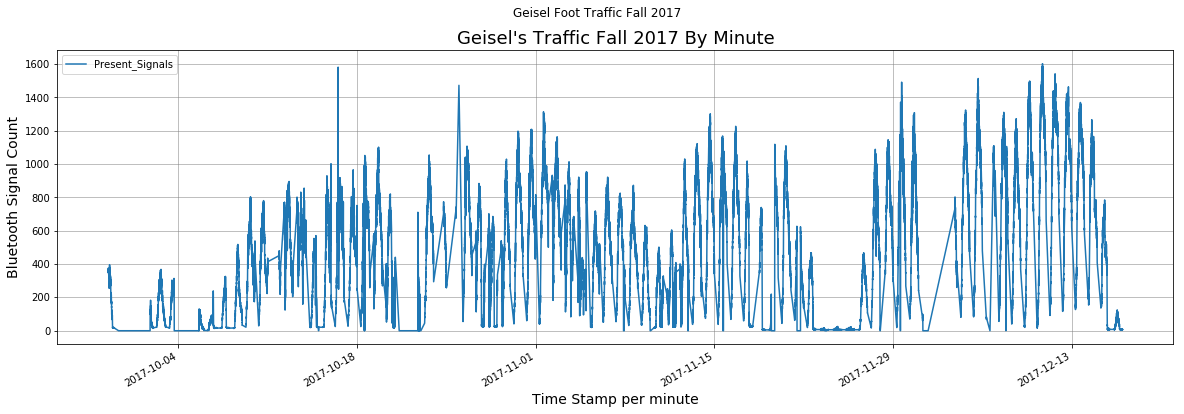

In [22]:
ax = df_geisel_fall.plot()
_ = ax.set_title("Geisel's Traffic Fall 2017 By Minute", fontsize=18)
plt.ylabel("Bluetooth Signal Count", fontsize=14)
plt.xlabel("Time Stamp per minute", fontsize=14)
plt.suptitle("Geisel Foot Traffic Fall 2017")
plt.grid(color='gray', linestyle='-', linewidth=0.5)


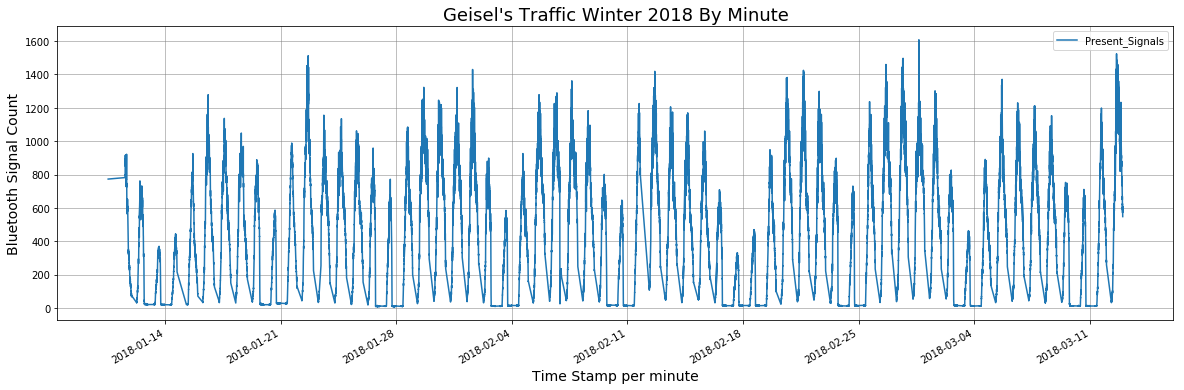

In [23]:
ax = df_geisel_winter.plot()
_ = ax.set_title("Geisel's Traffic Winter 2018 By Minute", fontsize=18)
plt.ylabel("Bluetooth Signal Count", fontsize=14)
plt.xlabel("Time Stamp per minute", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


From the graph above, we see that there is a consistent trend on the population of Geisel library. We predict that during both quarters, there are spikes in activity during the week day and drops during weekends and holidays.

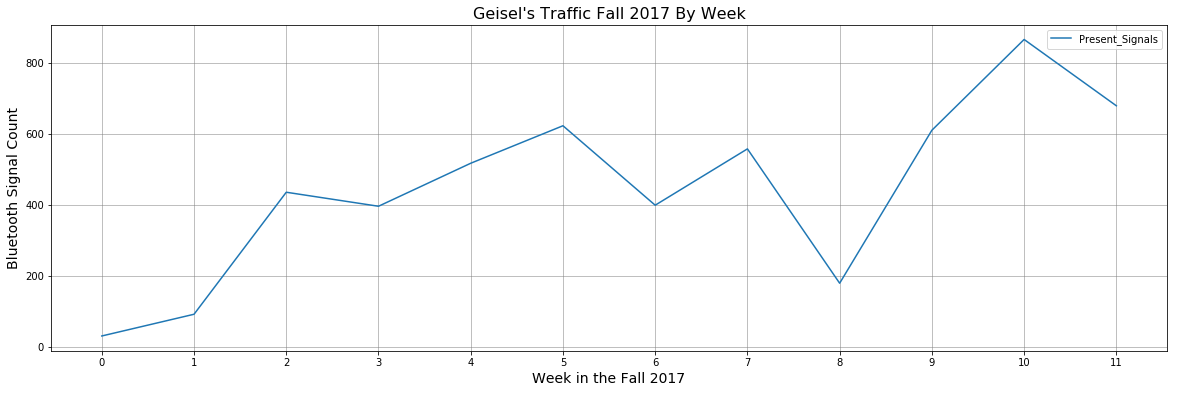

In [24]:
df_week_fall = df_geisel_fall.resample('W').mean()
df_week_fall.index = [week for week in range(len(df_week_fall))]
ax = df_week_fall.plot()
plt.xticks(df_week_fall.index)
_ = ax.set_title("Geisel's Traffic Fall 2017 By Week", fontsize=16)
plt.ylabel("Bluetooth Signal Count",fontsize=14)
plt.xlabel("Week in the Fall 2017",fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


During Fall quarter, there seems to be a dip on the number of people at Gesiel during week 8. This can be explained by the Thanksgiving holiday when students had a portion of the week off. So from this, it is highly probably that this holiday has affect the number of people at Geisel. 

We also see a small spike on Week 2, then a larger spike Week 5, 7, and finally the largest spike in Week 10. This probably occurred because there were midterms for some students during week 2, 5, and 7. The most impressive spike at Week 10 is likely due to campus-wide finals. We see minimal activity in Week 0 and 1, we think this reflects the carefree nature of Week 1 and the lack of material to study for.

We also have to keep note that for Fall Quarter, Waitz warned that their detectors overestimated the number of signals at Geisel. This over-estimation is a far reach from our control.


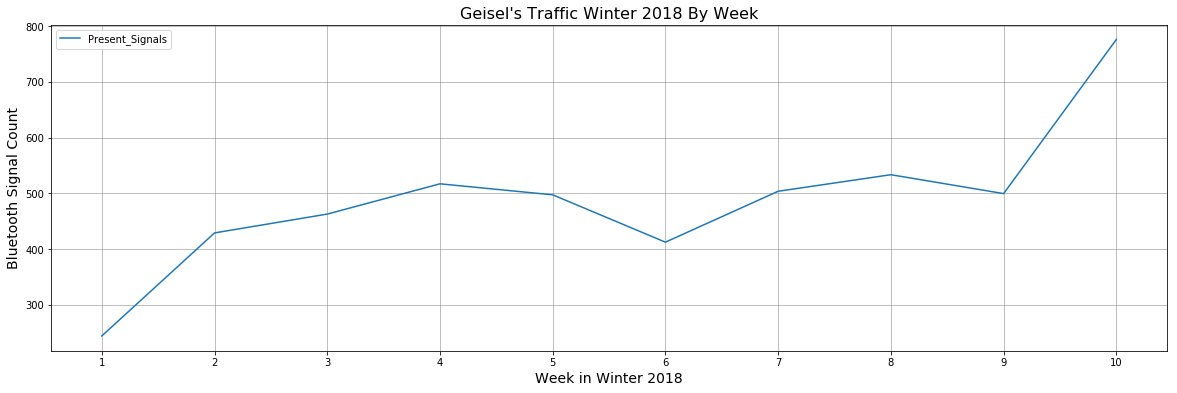

In [25]:
df_week_winter = df_geisel_winter.resample('W').mean()
df_week_winter.index = [week for week in range(1, len(df_week_winter)+1)]
ax = df_week_winter.plot()
plt.xticks(df_week_winter.index)
_ = ax.set_title("Geisel's Traffic Winter 2018 By Week", fontsize=16)
plt.xlabel('Week in Winter 2018', fontsize=14)
plt.ylabel('Bluetooth Signal Count',fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


From Winter Quarter,there is a slight increase trend in week 2, 4, 7, and a final dramatic increase 10, are again due to midterms and finals preparation. There is a dip in Week 6 which is most likely a less loaded week for students.

Note* This data is updated all the way to March 12, which is week 9.


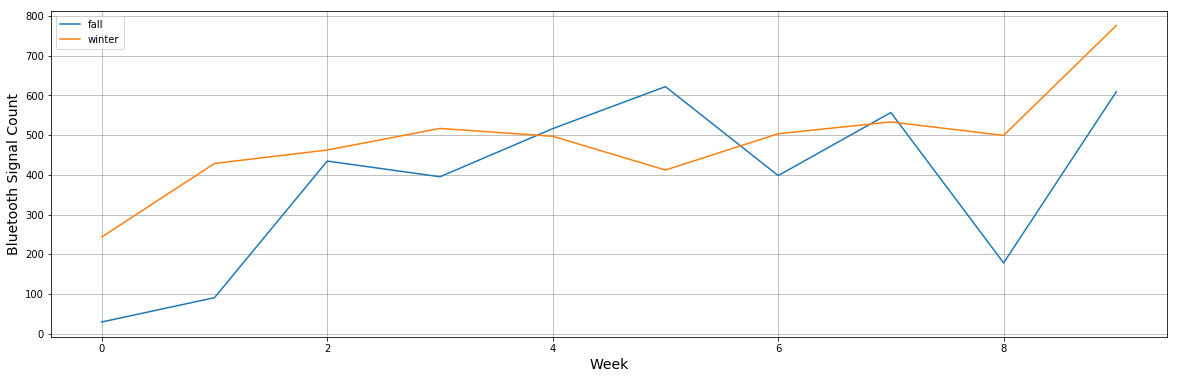

In [26]:
X = [week for week in range(len(df_week_winter))]
fall_weeks = list(df_week_fall['Present_Signals'][:len(df_week_winter.values)])
winter_weeks = list(df_week_winter['Present_Signals'])
week_cmp_df = pd.DataFrame({'fall': fall_weeks, 'winter': winter_weeks}, index=X)
plt.figure(); week_cmp_df.plot();
_ = ax.set_title("'Winter and Fall 2017-18 School Year", fontsize=16)
plt.xlabel("Week", fontsize=14)
plt.ylabel('Bluetooth Signal Count',fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


We see that during midterms and finals, the amount of people in Geisel increases. We assume that the exam trends in both quarters are a little different due to different holidays. So we believe Fall Quarter may have more midterms on week 5 (in the actual middle of the quarter) and that Winter has midterms more spread out.

We also see that during winter quarter, there are less dramatic changes compared to Fall quarter. The quarter seems to be more steadily busy.


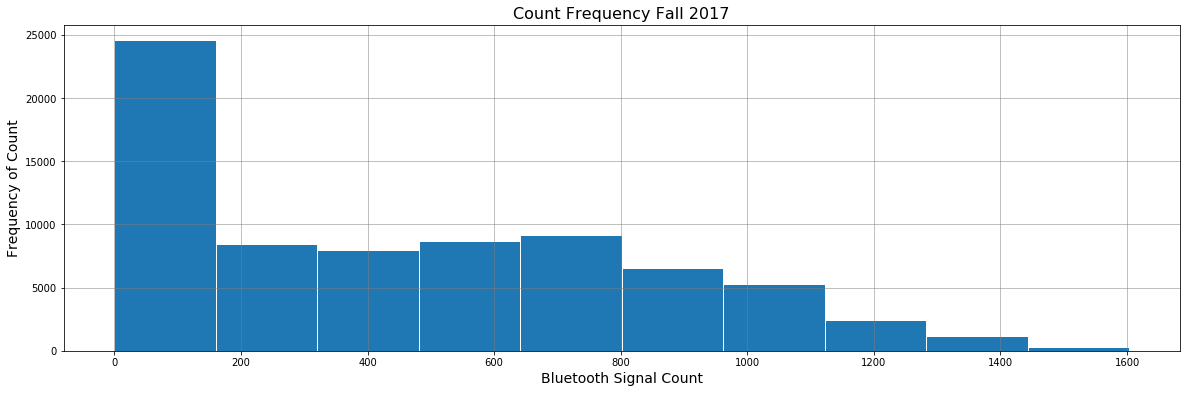

In [27]:
df_geisel_fall.hist(edgecolor='white', linewidth=1)
plt.title("Count Frequency Fall 2017", fontsize=16)
plt.xlabel('Bluetooth Signal Count', fontsize=14)
plt.ylabel('Frequency of Count',fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


In the graph above and the graphs below we show frequency. Here, we define frequency as a count of the amount of minutes that correspond to a specific signal count. For example, a Bluetooth Signal Count of 800 with corresponding Frequency 10000 means that there were a total of 10000 minutes during which the population at Geisel was 800. We visualize the frequency of signals throughout Geisel.

We see that there is a rough normal distribution, with an approximate mean at around 700 signals with the exception of counts between 0 and 200. We believe this is due to the drop in activity at Geisel at night-time and during holidays.

*The large number of 0 occurs because geisel typically doesn't have any people at night*


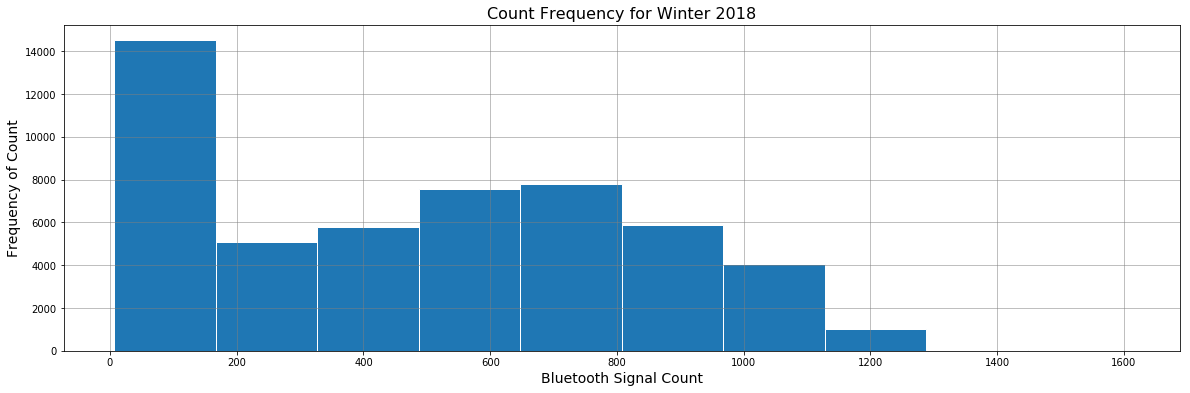

In [28]:
df_geisel_winter.hist(edgecolor='white', linewidth=1)
plt.title("Count Frequency for Winter 2018", fontsize=16)
plt.xlabel('Bluetooth Signal Count', fontsize=14)
plt.ylabel('Frequency of Count',fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


There is a strong normal distribution around 700. 

*The large number of 0 occurs because geisel typically doesn't have any people at night*

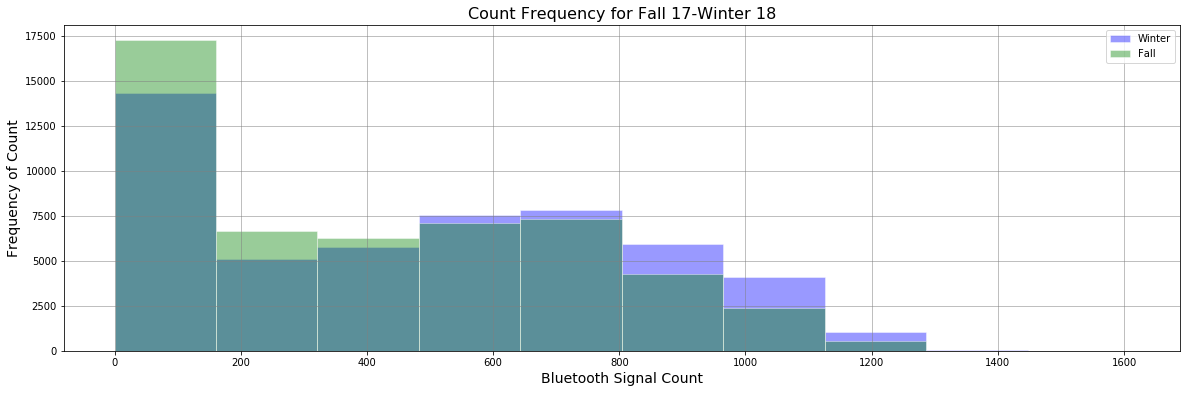

In [29]:
df_days = pd.DataFrame(list(df_geisel_winter['Present_Signals']), columns=['Winter'])
df_days['Fall'] = list(df_geisel_fall['Present_Signals'])[:len(df_days)]
plt.figure();
df_days.plot.hist(color=['blue', 'green'], alpha=0.4,edgecolor='white', linewidth=1)
plt.title("Count Frequency for Fall 17-Winter 18", fontsize=16)
plt.xlabel("Bluetooth Signal Count", fontsize=14)
plt.ylabel("Frequency of Count", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


In the graph above we show frequency. Here, we define frequency as a count of the amount of minutes that correspond to a specific signal count. For example, a Bluetooth Signal Count of 800 with corresponding Frequency 10000 means that there were a total of 10000 minutes during which the population at Geisel was 800. 

We visualize the frequency of signals throughout Geisel over time. There should be a significant amount of low signals because during the night and most of the morning geisel has relatively few people. In other words, lower amounts of traffic is most common as Geisel there isn't as many people in Geisel during the night and early morning for most days.

We also see that there is a rough median for both Fall and Winter for around 750 people. Winter Quarter typically has a more normal distribution.



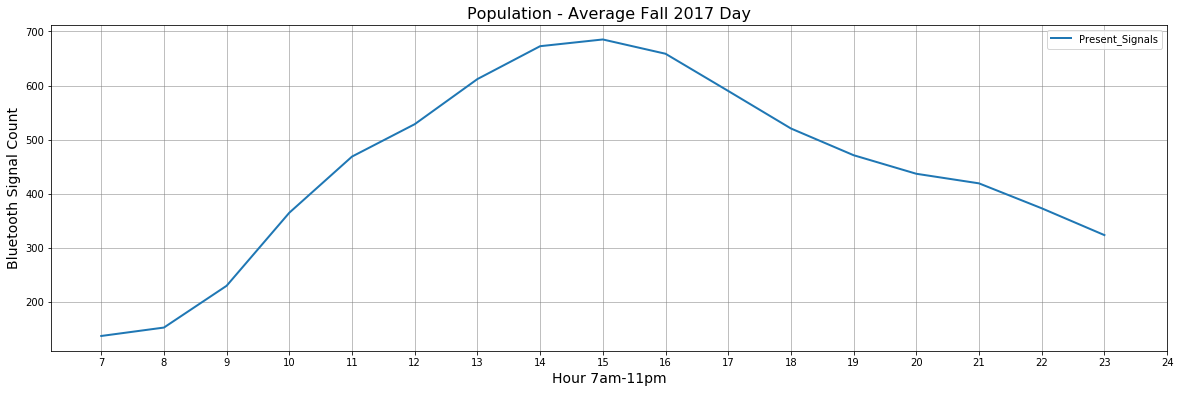

In [30]:
df_geisel_fall.groupby(df_geisel_fall.index.hour).mean().plot(linewidth=2)
_ = plt.xticks([hour for hour in range(7, 25)])

plt.title("Population - Average Fall 2017 Day", fontsize=16)
plt.xlabel("Hour 7am-11pm", fontsize=14)
plt.ylabel("Bluetooth Signal Count", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


We see for fall, it reaches its max around 2:30PM. There is a slow increase before this time and then the number of people in Geisel slowly decreases.

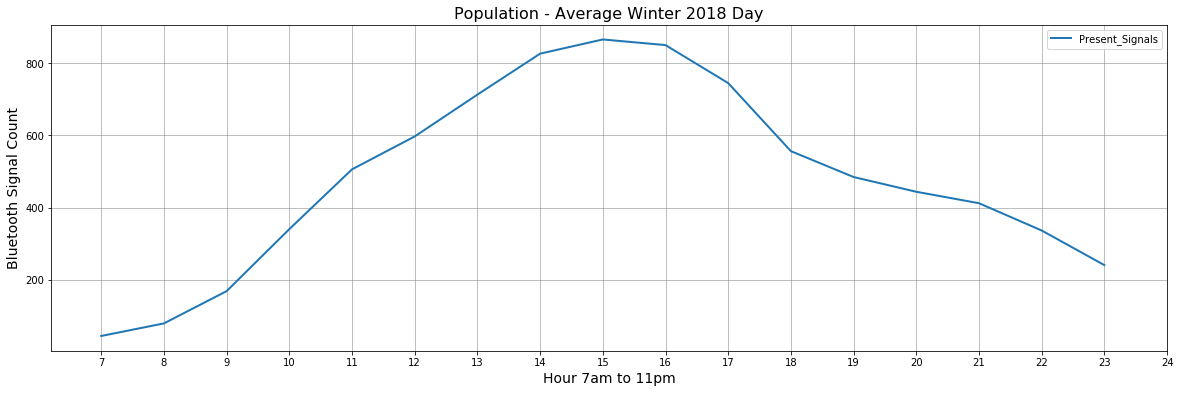

In [31]:
df_geisel_winter.groupby(df_geisel_winter.index.hour).mean().plot(linewidth=2)
_ = plt.xticks([hour for hour in range(7, 25)])

plt.title("Population - Average Winter 2018 Day", fontsize=16)
plt.ylabel("Bluetooth Signal Count", fontsize=14)
plt.xlabel("Hour 7am to 11pm", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


From this data, the steepest increase in population at Geisel occurs between 9am and 11am as students fill into the library study spaces. Interestingly, this seems to occurr a full hour later than during Fall Quarter, possibly because of the later sunrise. There is a constant increase in population until 3pm, which holds its place as the peak hour for Fall and Winter; however the peak represents more signals than it did during the Fall. Between 5pm and 6pm there is a steep drop off as students leave the library for the day. We consider that this earlier drop off is also related to shorter Winter days. rom 6pm to 11pm there is a steady decrease. At 11pm the library is about at a quarter of peak population.


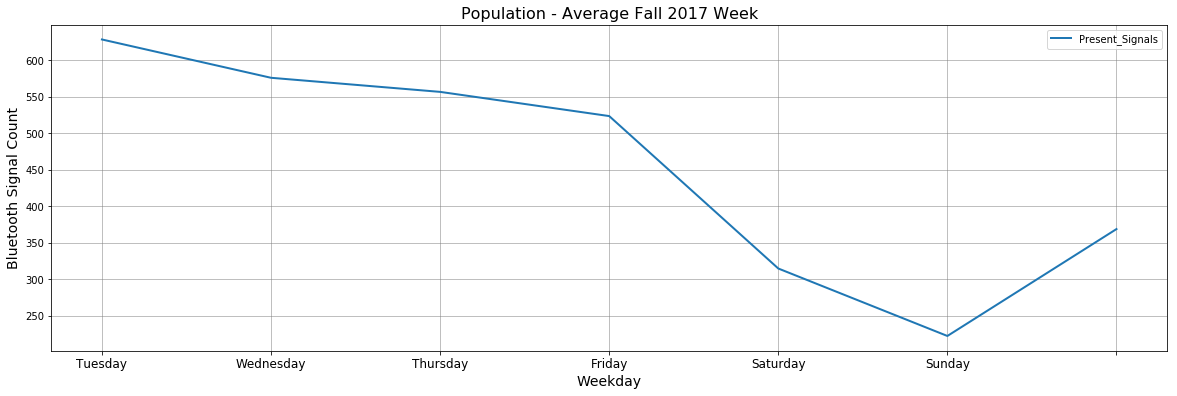

In [32]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df_geisel_fall.groupby(df_geisel_fall.index.weekday).mean().plot(linewidth=2)
_ = ax.set_xticklabels(days_of_week, fontsize=12)

plt.title("Population - Average Fall 2017 Week", fontsize=16)
plt.ylabel("Bluetooth Signal Count", fontsize=14)
plt.xlabel('Weekday', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


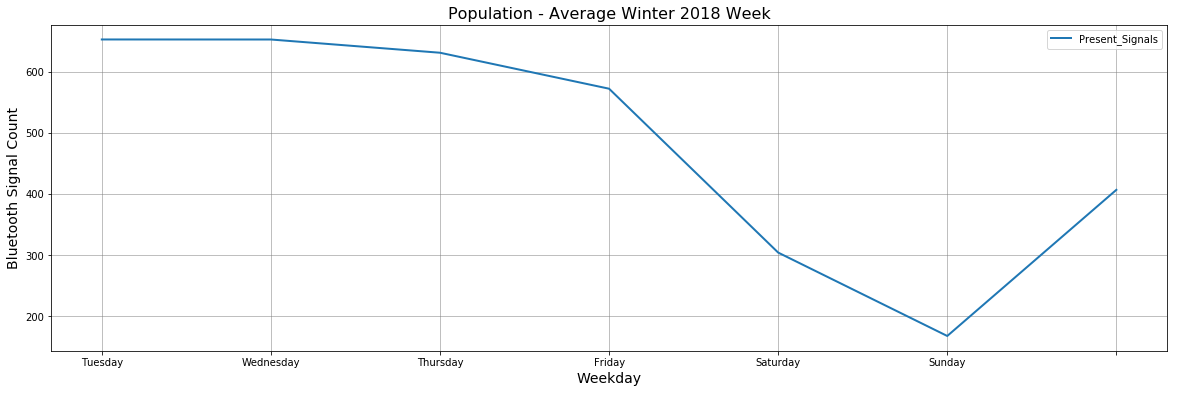

In [33]:
ax = df_geisel_winter.groupby(df_geisel_winter.index.weekday).mean().plot(linewidth=2)
_ = ax.set_xticklabels(days_of_week)
plt.title("Population - Average Winter 2018 Week", fontsize=16)
plt.ylabel("Bluetooth Signal Count", fontsize=14)
plt.xlabel("Weekday", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)


In both quarters it seems consistent that Mondays are the busiest day. After that Geisel's population is consistent until Wednesday comes around. The most dramatic drop in population ocurrs on Friday and Saturday when traffic decreases to a quarter of its peak population. Library traffic then begins to recover to about half of peak population on Sunday.


#### Schedule of Classes

Here we show the graphs that illustrate the class schedule data for each day of the week. The y-axis represents the number of people in class during each 5-minute period throughout the day. And the ticks for the x-axis represent the start or end of each 5-minute period. The resulting graphs look similar to histograms. We see consistent and sudden dips in population that we ascribe to the 10-minute grace periods between classes that allow students to walk to another class after a class ends. We asssume during these 10 minutes students at Geisel library pack up and head to class.We can also observe that Monday/Wednesday/Friday class schedule has different class time comparing to Tuesday/Friday. The shift from 1 hour blocks of time on MWF to 1.5 hour blocks TuTh is evident and visible in our data.

 

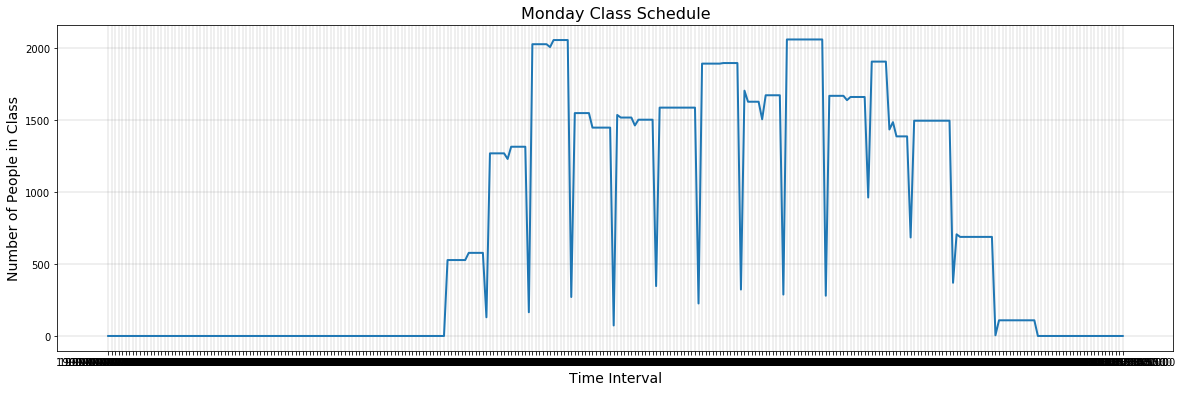

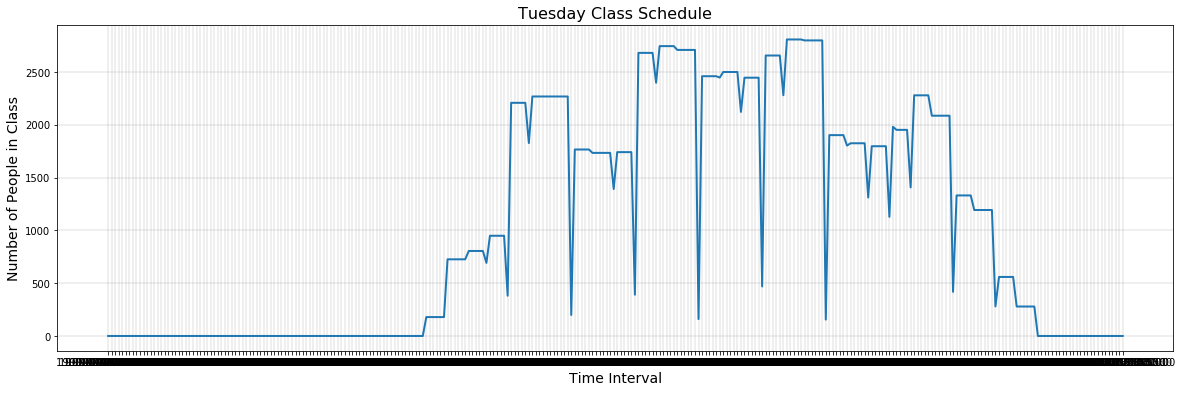

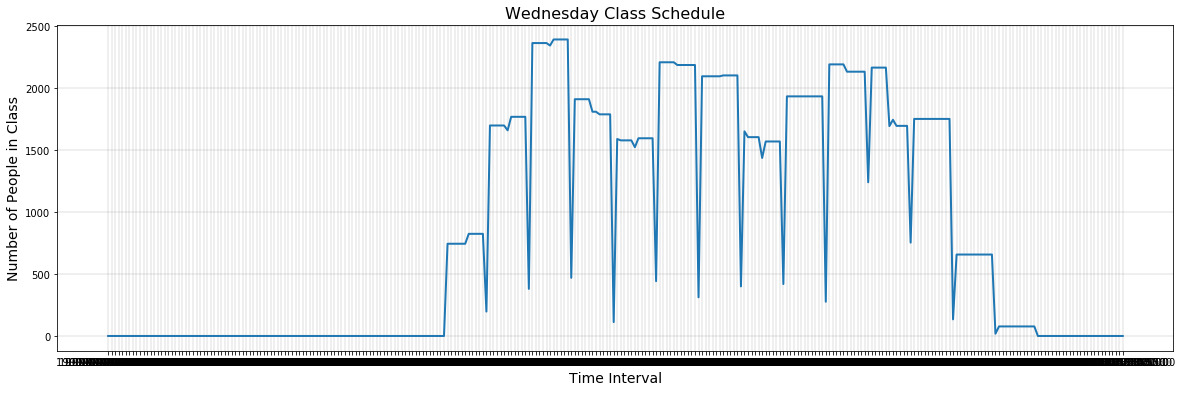

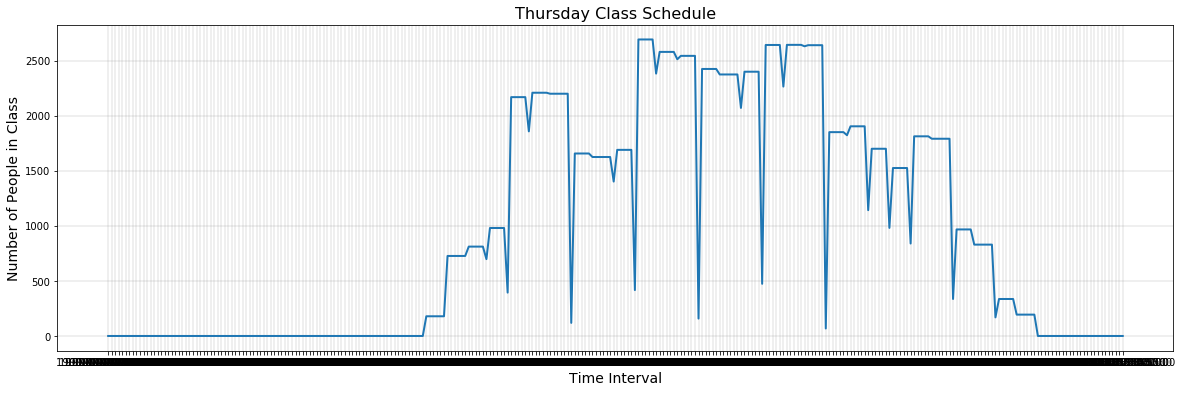

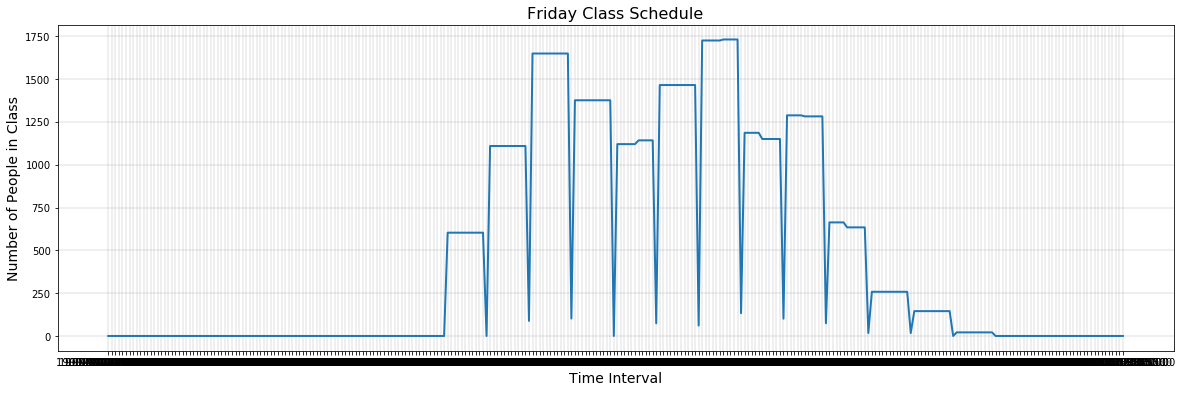

In [34]:
# Firstly, we load the processed csv files into data frames.
monday_class_schedule_df = pd.read_csv('data/monday_class_schedule.csv')
tuesday_class_schedule_df = pd.read_csv('data/tuesday_class_schedule.csv')
wednesday_class_schedule_df = pd.read_csv('data/wednesday_class_schedule.csv')
thursday_class_schedule_df = pd.read_csv('data/thursday_class_schedule.csv')
friday_class_schedule_df = pd.read_csv('data/friday_class_schedule.csv')

# Then we plot them for each day of the week
plt.plot(monday_class_schedule_df['Time_Stamp'], monday_class_schedule_df['Number_of_People'], linewidth=2)
plt.ylabel('Number of People in Class', fontsize=14)
plt.xlabel('Time Interval', fontsize=14)
plt.title('Monday Class Schedule', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.plot(tuesday_class_schedule_df['Time_Stamp'], tuesday_class_schedule_df['Number_of_People'],linewidth=2)
plt.ylabel('Number of People in Class', fontsize=14)
plt.xlabel('Time Interval', fontsize=14)
plt.title('Tuesday Class Schedule', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.plot(wednesday_class_schedule_df['Time_Stamp'], wednesday_class_schedule_df['Number_of_People'],linewidth=2)
plt.ylabel('Number of People in Class', fontsize=14)
plt.xlabel('Time Interval', fontsize=14)
plt.title('Wednesday Class Schedule', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.plot(thursday_class_schedule_df['Time_Stamp'], thursday_class_schedule_df['Number_of_People'],linewidth=2)
plt.ylabel('Number of People in Class', fontsize=14)
plt.xlabel('Time Interval', fontsize=14)
plt.title('Thursday Class Schedule', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.plot(friday_class_schedule_df['Time_Stamp'], friday_class_schedule_df['Number_of_People'],linewidth=2)
plt.ylabel('Number of People in Class', fontsize=14)
plt.xlabel('Time Interval', fontsize=14)
plt.title('Friday Class Schedule', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()


After we visualize the schedule data, we will visualize the Geisel Library's foot traffic data in the same way, in which we will show average signal data for each day of the week. And finally we overlay all of the days, i.e., from Monday to Friday, into a single graph, so we can illustrate the difference between each day for the signal data. Notice that y-axis of these graphs represent the sum of present signal for all floors at Geisel Library. And the x-axis is same as the graphs for schedule data above, i.e., each tick represents start/end of a 5-minute period. One interesting observation we can see is that students are laziest on Friday and are most hardworking on Monday based on the graphs. And the graphs are shown below:



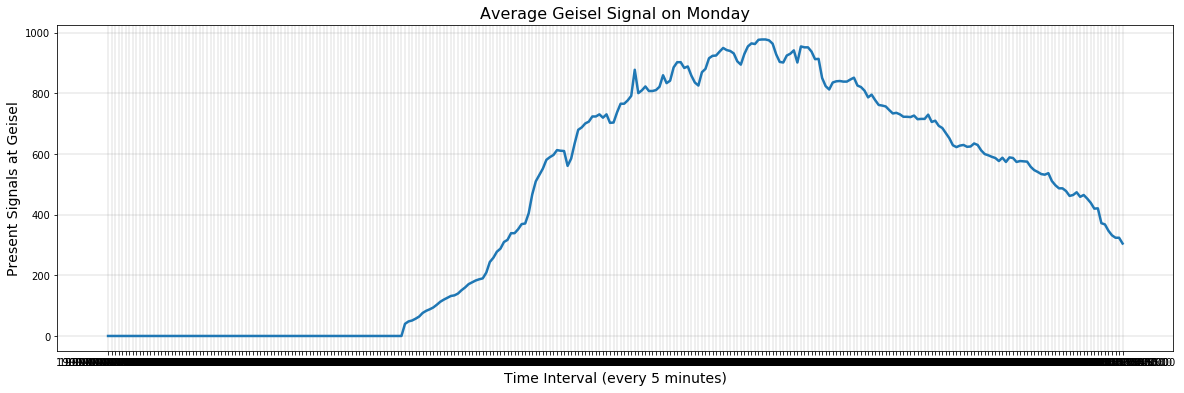

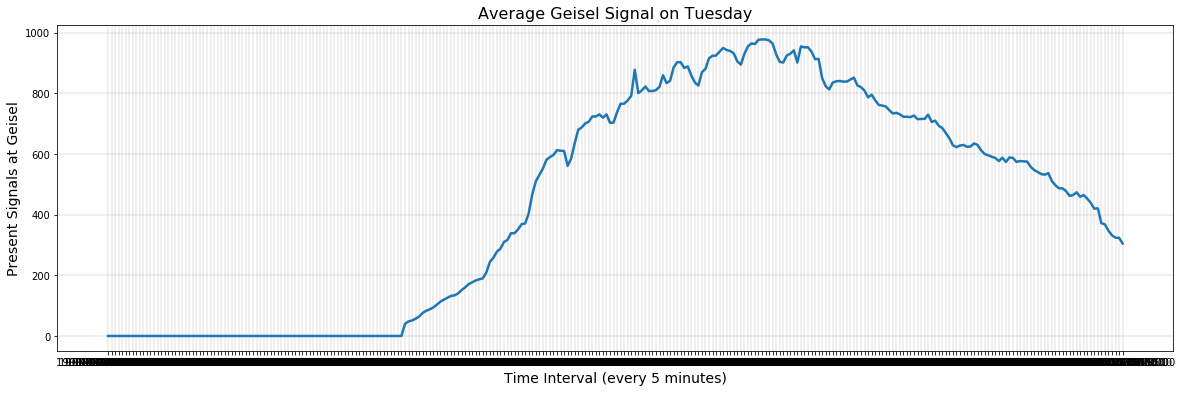

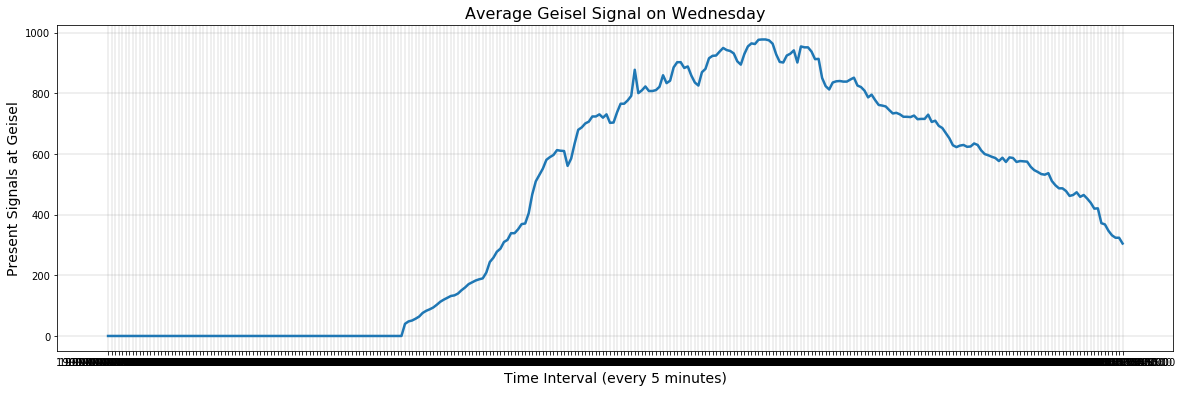

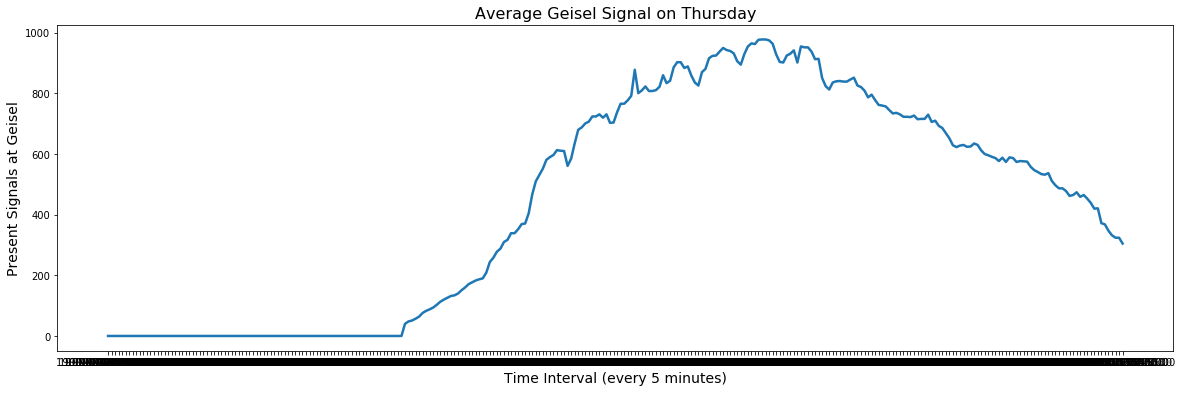

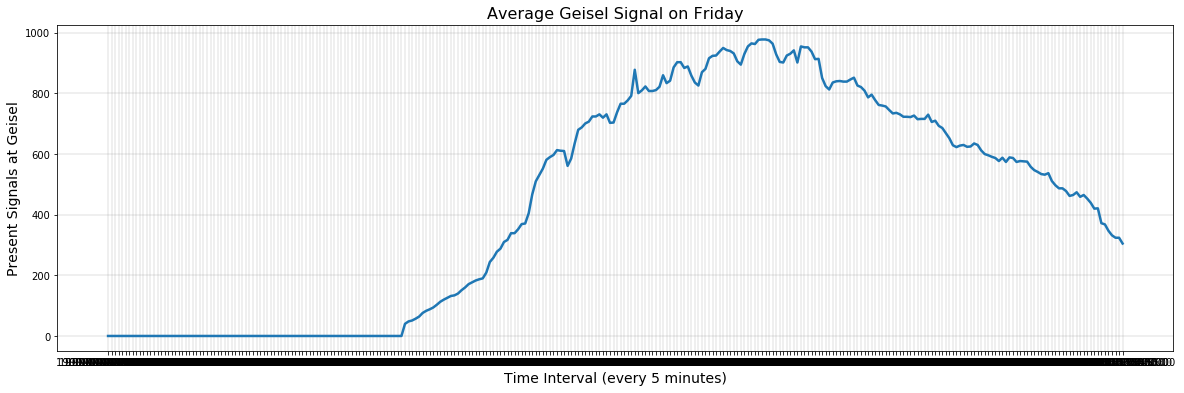

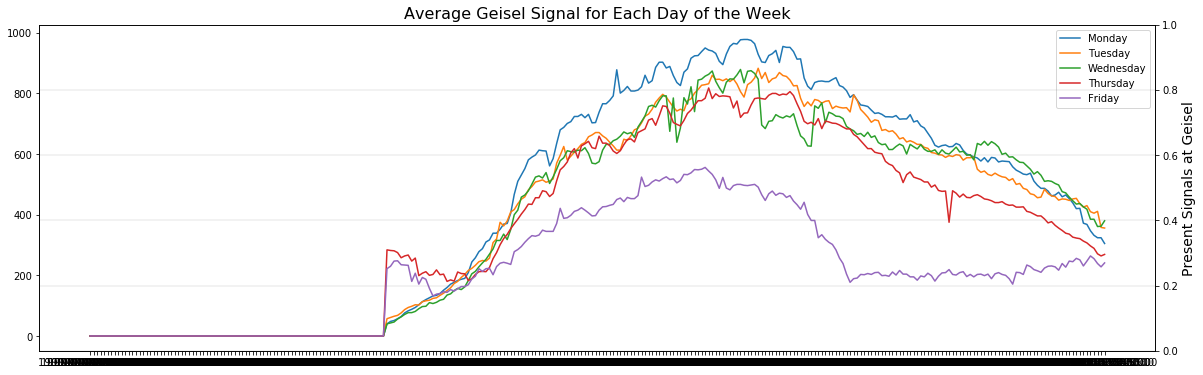

In [35]:
# Firstly, we load the processed csv files into dataframes 
monday_geisel_average_df = pd.read_csv('data/geisel_monday_average_2017.csv')
tuesday_geisel_average_df = pd.read_csv('data/geisel_tuesday_average_2017.csv')
wednesday_geisel_average_df = pd.read_csv('data/geisel_wednesday_average_2017.csv')
thursday_geisel_average_df = pd.read_csv('data/geisel_thursday_average_2017.csv')
friday_geisel_average_df = pd.read_csv('data/geisel_friday_average_2017.csv')

# Then we output graphs for geisel singal data for each day of the week 
plt.plot(monday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], linewidth=2.5)
plt.title('Average Geisel Signal on Monday', fontsize=16)
plt.xlabel('Time Interval (every 5 minutes)',fontsize=14)
plt.ylabel('Present Signals at Geisel', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.plot(tuesday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], linewidth=2.5)
plt.title('Average Geisel Signal on Tuesday', fontsize=16)
plt.xlabel('Time Interval (every 5 minutes)',fontsize=14)
plt.ylabel('Present Signals at Geisel', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.plot(wednesday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], linewidth=2.5)
plt.title('Average Geisel Signal on Wednesday', fontsize=16)
plt.xlabel('Time Interval (every 5 minutes)',fontsize=14)
plt.ylabel('Present Signals at Geisel', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()
plt.plot(thursday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], linewidth=2.5)
plt.title('Average Geisel Signal on Thursday', fontsize=16)
plt.xlabel('Time Interval (every 5 minutes)',fontsize=14)
plt.ylabel('Present Signals at Geisel', fontsize=14)
plt.ylabel('Present Signals at Geisel')
plt.show()

plt.plot(friday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], linewidth=2.5)
plt.title('Average Geisel Signal on Friday', fontsize=16)
plt.xlabel('Time Interval (every 5 minutes)',fontsize=14)
plt.ylabel('Present Signals at Geisel', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

# Finally, we overlay all of these graphs into one single graph to illustrate the differences
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(monday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], label='Monday')
ax1.plot(tuesday_geisel_average_df['Time_Stamp'], tuesday_geisel_average_df['Present_Signals'], label='Tuesday')
ax1.plot(wednesday_geisel_average_df['Time_Stamp'], wednesday_geisel_average_df['Present_Signals'], label='Wednesday')
ax1.plot(thursday_geisel_average_df['Time_Stamp'], thursday_geisel_average_df['Present_Signals'], label='Thursday')
ax1.plot(friday_geisel_average_df['Time_Stamp'], friday_geisel_average_df['Present_Signals'], label='Friday')
ax1.legend()
plt.title('Average Geisel Signal for Each Day of the Week',fontsize=16)
plt.xlabel('Time Interval (every 5 minutes)',fontsize=14)
plt.ylabel('Present Signals at Geisel',fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()



After we have shown the graphs for class schedule data and Geisel Library's signal data, we can now overlay schedule data with signal data to observe their relationship. The y-axis of these graphs represent present signal data at Geisel Library and number of people in class at the same time. And the ticks in the x-axis represent the start/end for each 5-minutes period. There are two main observations we can make from these graphs. The first observation is that as the number of people in classes increase throughout the day, signal data also increases, and vice versa. The second observation is that there are some sudden drops in the signal data during the grace periods between classes as students prepare to leave the library for class.


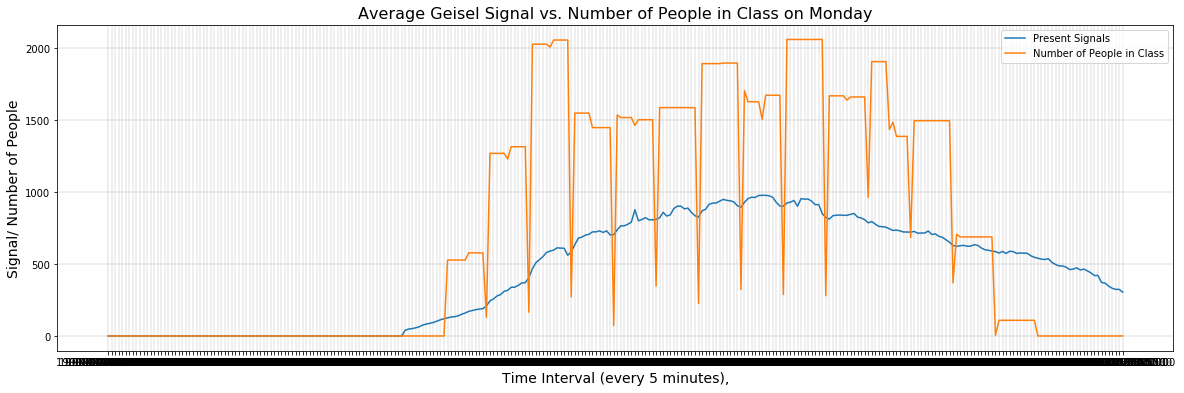

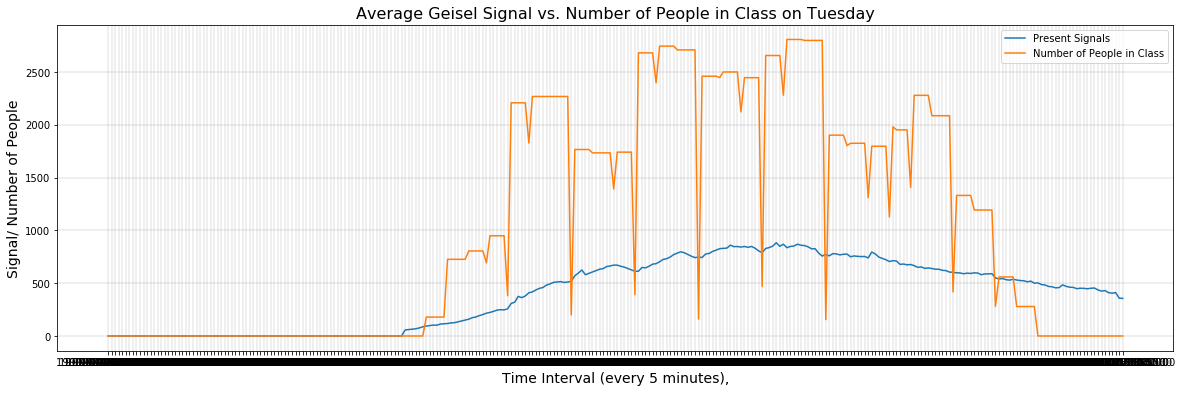

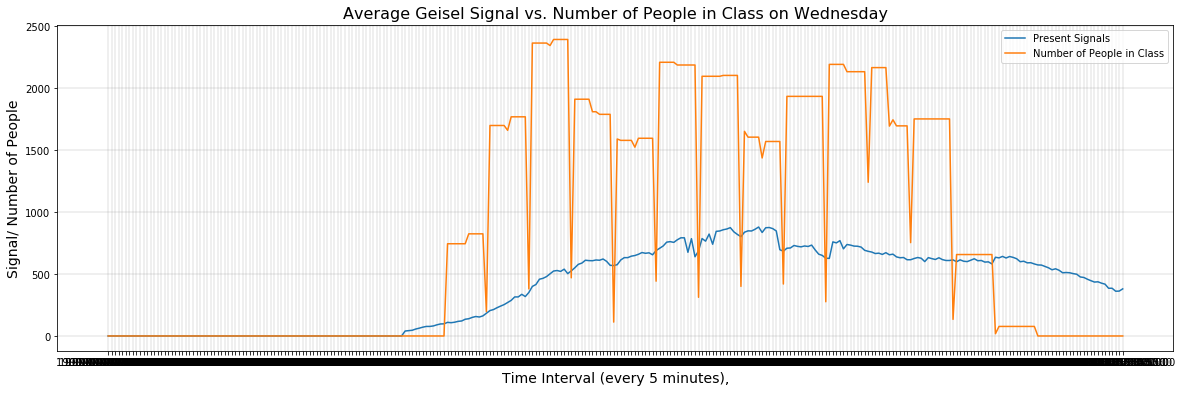

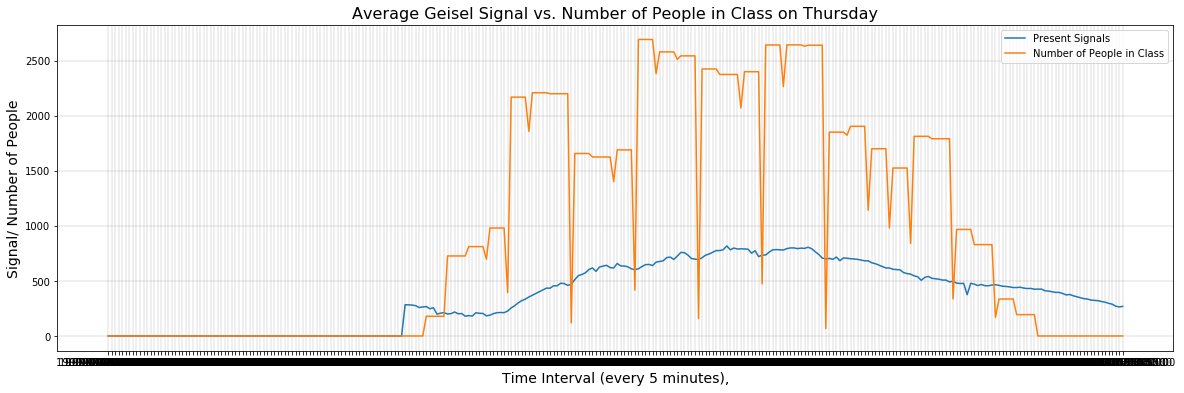

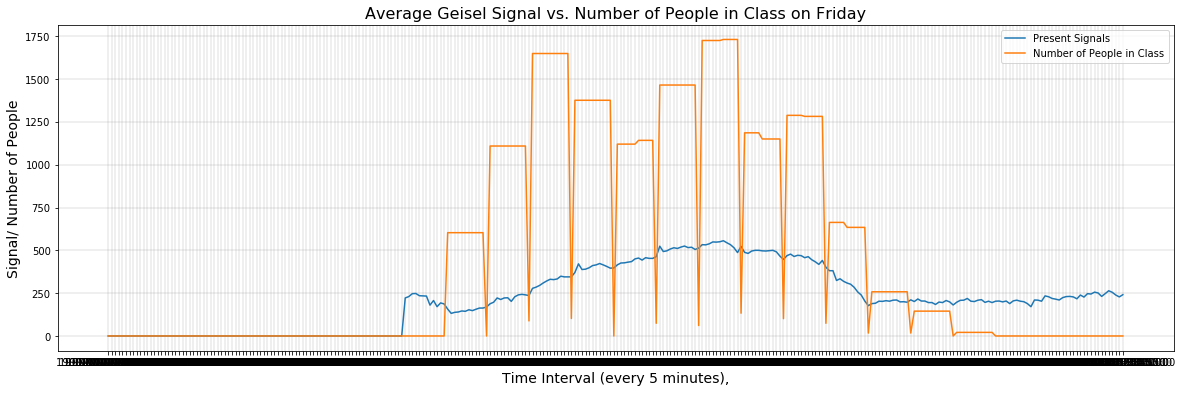

In [36]:
overlay_df_m = pd.merge(monday_geisel_average_df, monday_class_schedule_df, on='Time_Stamp')
overlay_df_t = pd.merge(tuesday_geisel_average_df, tuesday_class_schedule_df, on='Time_Stamp')
overlay_df_w = pd.merge(wednesday_geisel_average_df, wednesday_class_schedule_df, on='Time_Stamp')
overlay_df_r = pd.merge(thursday_geisel_average_df, thursday_class_schedule_df, on='Time_Stamp')
overlay_df_f = pd.merge(friday_geisel_average_df, friday_class_schedule_df, on='Time_Stamp')

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_m['Time_Stamp'], overlay_df_m['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_m['Time_Stamp'], overlay_df_m['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday',fontsize=16)
plt.xlabel('Time Interval (every 5 minutes),',fontsize=14)
plt.ylabel('Signal/ Number of People', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()


fig, ax1 = plt.subplots()
ax1.plot(overlay_df_t['Time_Stamp'], overlay_df_t['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_t['Time_Stamp'], overlay_df_t['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Tuesday',fontsize=16)
plt.xlabel('Time Interval (every 5 minutes),',fontsize=14)
plt.ylabel('Signal/ Number of People', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_w['Time_Stamp'], overlay_df_w['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_w['Time_Stamp'], overlay_df_w['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Wednesday',fontsize=16)
plt.xlabel('Time Interval (every 5 minutes),',fontsize=14)
plt.ylabel('Signal/ Number of People', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_r['Time_Stamp'], overlay_df_r['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_r['Time_Stamp'], overlay_df_r['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Thursday',fontsize=16)
plt.xlabel('Time Interval (every 5 minutes),',fontsize=14)
plt.ylabel('Signal/ Number of People', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_f['Time_Stamp'], overlay_df_f['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_f['Time_Stamp'], overlay_df_f['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Friday',fontsize=16)
plt.xlabel('Time Interval (every 5 minutes),',fontsize=14)
plt.ylabel('Signal/ Number of People', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)
plt.show()

plt.show()



### Visualization for shuttle data

Now we plot the graphs for the shuttle data that we have processed and transformed in Data Processing section. Notice that we only have one week of data from 3 March, 2018 to 9 March, 2018, and we started scrapping in the afternoon on Monday, 3 March, 2018, so the half of the day for Monday graph is flat on the x-axis until the middle of the day. Otherwise, the graphs seem very reasonable, in which shuttle buses are most active at the start and end of the days, as you will see below. Also, notice that the ticks on the x-axis of of these graphs represent the start/end of each 5-minutes interval, and the y-axis represents the sum of number of people on all shuttle buses at UCSD. 

In [12]:
# First we load the processed data 
df_shuttle_m = pd.read_csv('data/monday_shuttle.csv')
df_shuttle_t = pd.read_csv('data/tuesday_shuttle.csv')
df_shuttle_w = pd.read_csv('data/wednesday_shuttle.csv')
df_shuttle_r = pd.read_csv('data/thursday_shuttle.csv')
df_shuttle_f = pd.read_csv('data/friday_shuttle.csv')

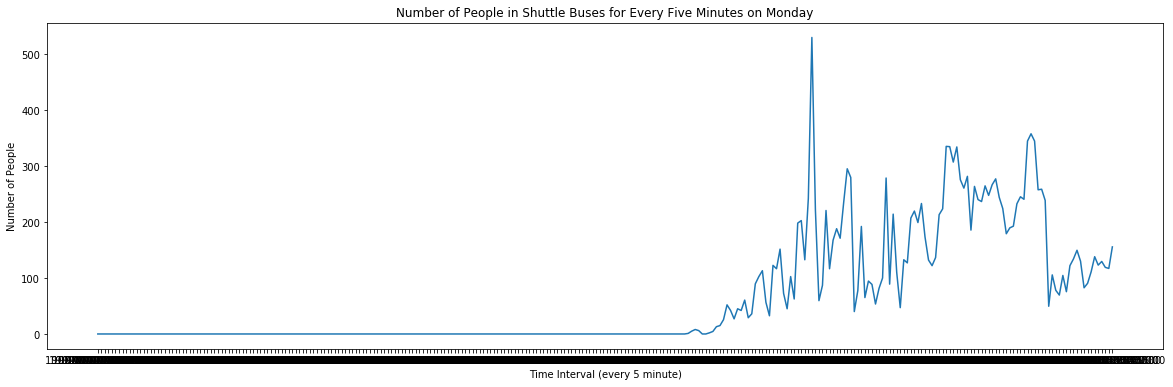

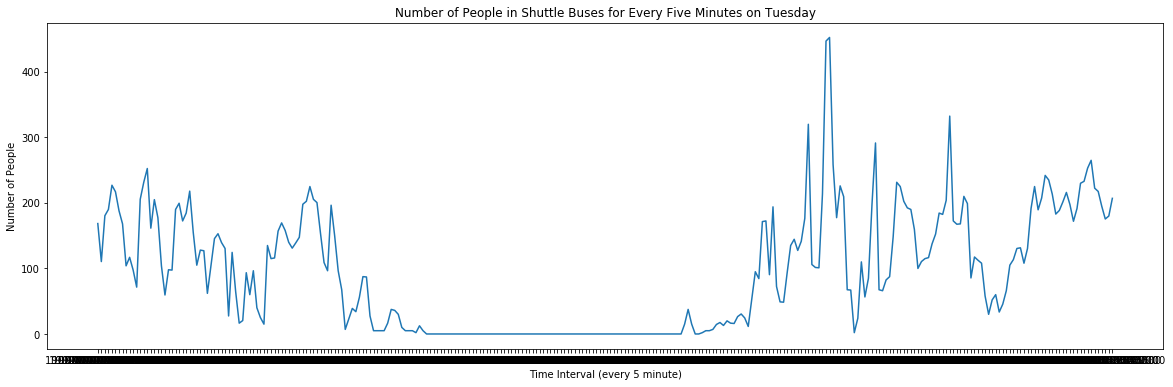

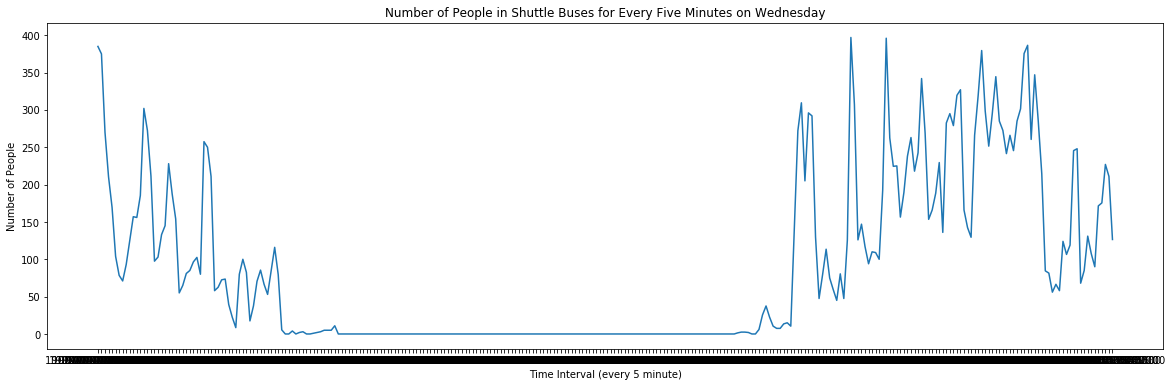

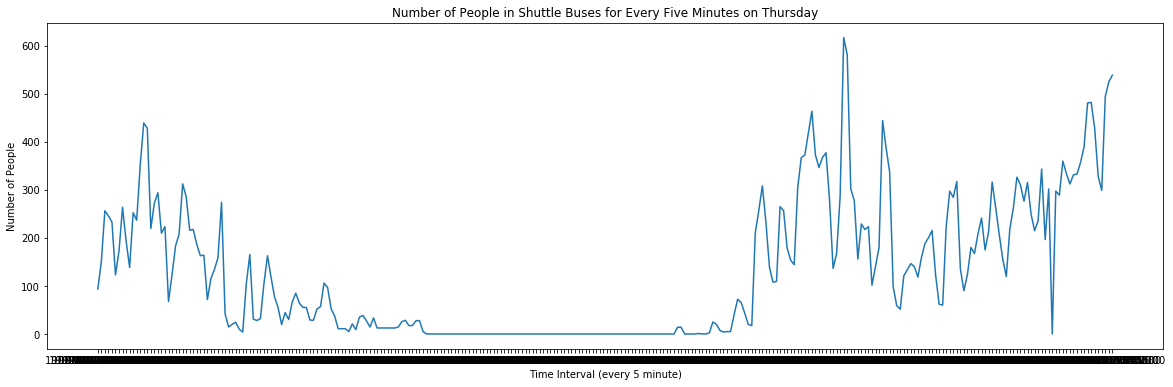

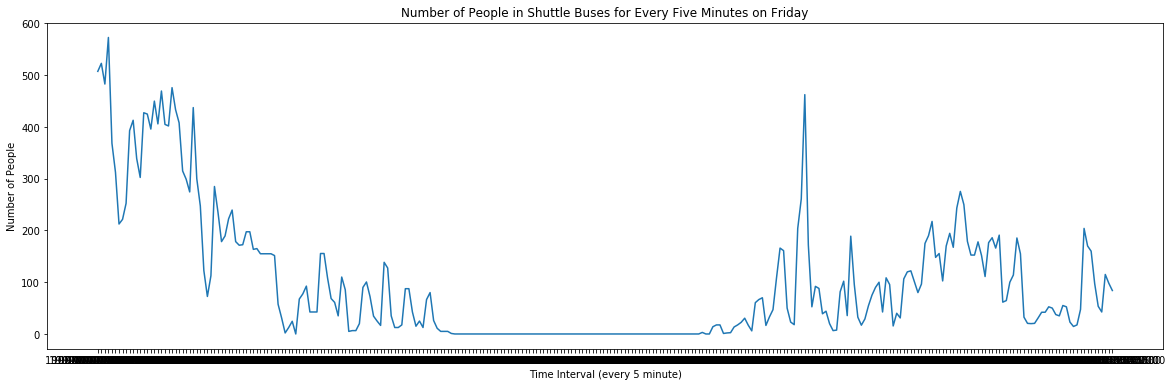

In [15]:
plt.plot(df_shuttle_m['Time_Stamp'], df_shuttle_m['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Monday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_t['Time_Stamp'], df_shuttle_t['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Tuesday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_w['Time_Stamp'], df_shuttle_w['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Wednesday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_r['Time_Stamp'], df_shuttle_r['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Thursday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

plt.plot(df_shuttle_f['Time_Stamp'], df_shuttle_f['Number_of_People'])
plt.title('Number of People in Shuttle Buses for Every Five Minutes on Friday')
plt.xlabel('Time Interval (every 5 minute)')
plt.ylabel('Number of People')
plt.show()

After we have shown the graphs for the shuttle data for each day of the week, we will overlay the shuttle data with the schedule data to see how they relate to each other. Although the shuttle data only comes from a week in 2018 Spring quarter, while the Geisel signal data comes from the average of the 2017 Fall quarter, we will assume that shuttle data will be roughly similar for every day in general circumstane, i.e., students roughly come to school or leave school at the same time. By overlaying shuttle data with geisel data, we will roughly observe that, shuttles buses become very active in the morning when students come people to school, and when they become inactive again, number of people at Geisel will start to increase. On the other hand, when shuttls buses become active again when people start to leave school we suppose, number of people at Geisel Library will start to decrease. This visualization gives us an idea that there is an interesting relationship between shuttle data and Geisel data. Notice that the y-axis of these graphs represent signal data/ sum of the number of people on shuttle buses, while ticks on x-axis represent the 5-minutes interval throughout the day. 

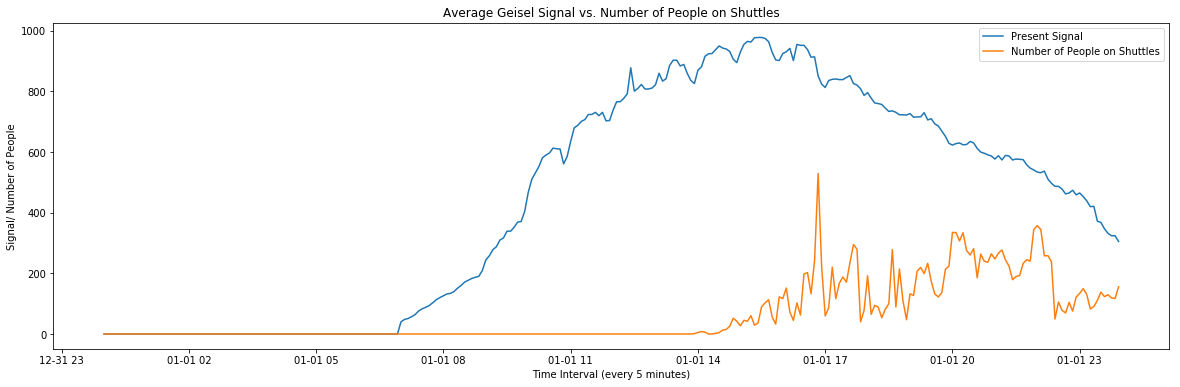

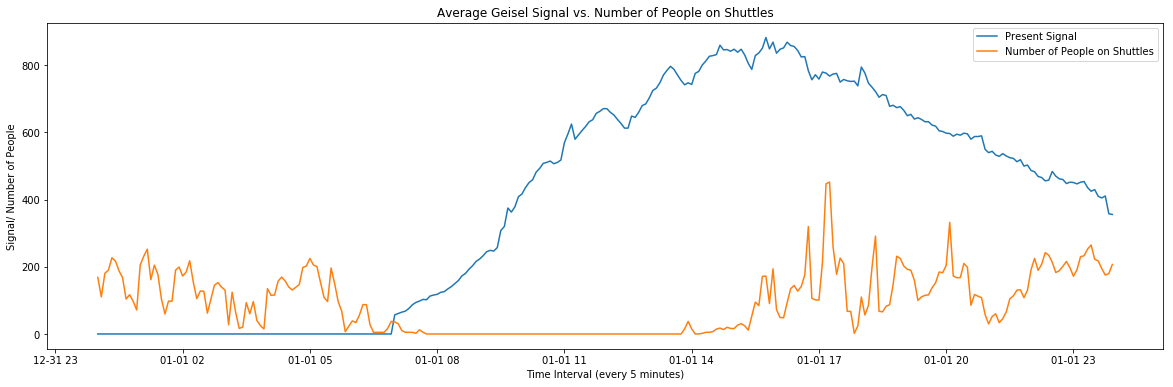

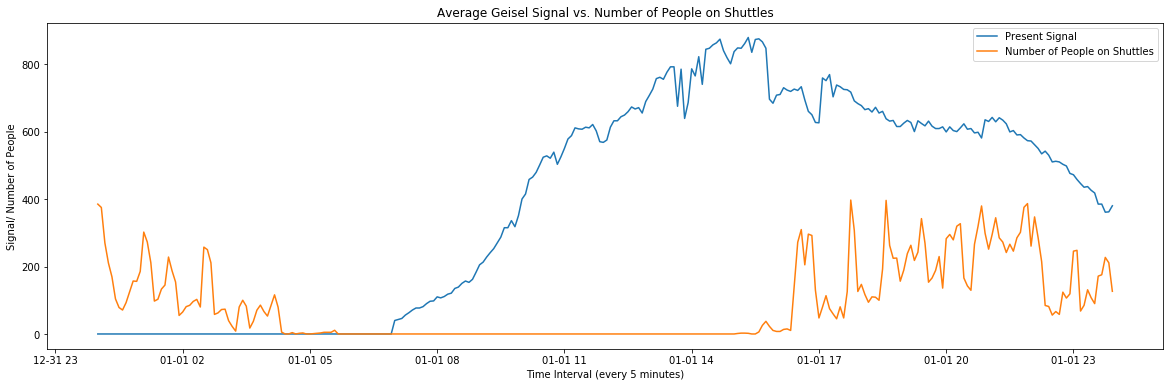

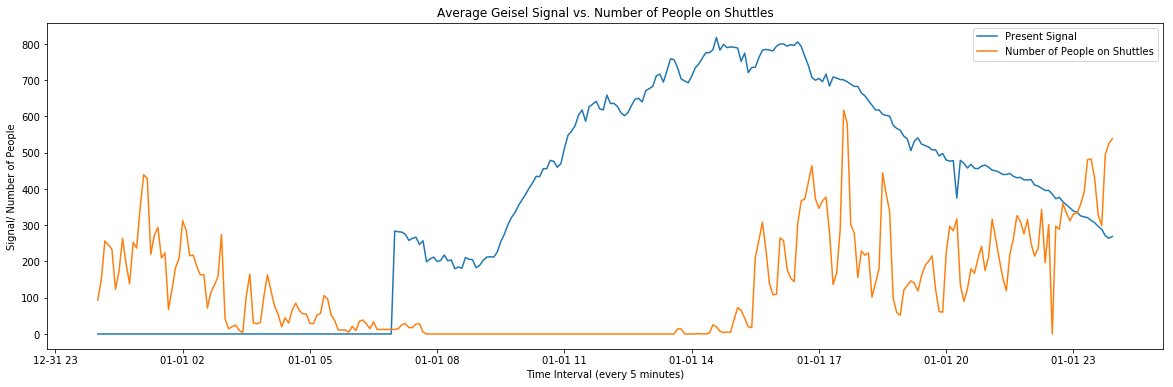

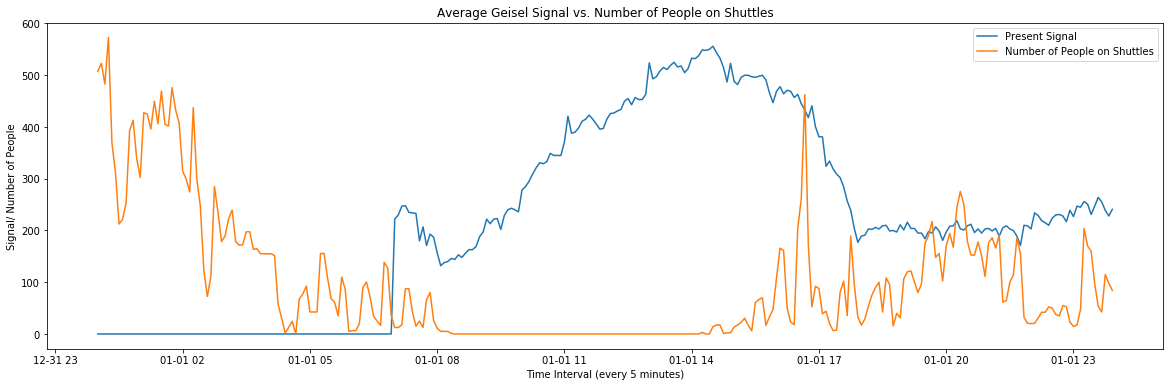

In [19]:
# Load Geisel data to overlay 
df_geisel_m = pd.read_csv('data/geisel_monday_average_2017.csv')
df_geisel_t = pd.read_csv('data/geisel_tuesday_average_2017.csv')
df_geisel_w = pd.read_csv('data/geisel_wednesday_average_2017.csv')
df_geisel_r = pd.read_csv('data/geisel_thursday_average_2017.csv')
df_geisel_f = pd.read_csv('data/geisel_friday_average_2017.csv')

df_geisel_m['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_t['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_w['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_r['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)
df_geisel_f['Time_Stamp'] = df_geisel_m['Time_Stamp'].apply(transform_datetime)

df_shuttle_m['Time_Stamp'] = df_shuttle_m['Time_Stamp'].apply(transform_datetime)
df_shuttle_t['Time_Stamp'] = df_shuttle_t['Time_Stamp'].apply(transform_datetime)
df_shuttle_w['Time_Stamp'] = df_shuttle_w['Time_Stamp'].apply(transform_datetime)
df_shuttle_r['Time_Stamp'] = df_shuttle_r['Time_Stamp'].apply(transform_datetime)
df_shuttle_f['Time_Stamp'] = df_shuttle_f['Time_Stamp'].apply(transform_datetime)

merged_df_m = pd.merge(df_geisel_m, df_shuttle_m, on='Time_Stamp')
merged_df_t = pd.merge(df_geisel_t, df_shuttle_t, on='Time_Stamp')
merged_df_w = pd.merge(df_geisel_w, df_shuttle_w, on='Time_Stamp')
merged_df_r = pd.merge(df_geisel_r, df_shuttle_r, on='Time_Stamp')
merged_df_f = pd.merge(df_geisel_f, df_shuttle_f, on='Time_Stamp')

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

fig, ax1 = plt.subplots() 
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Present_Signals'], label='Present Signal')
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Number_of_People'], label='Number of People on Shuttles')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People on Shuttles')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show() 

### Weather

#### Fall Quarter 2017

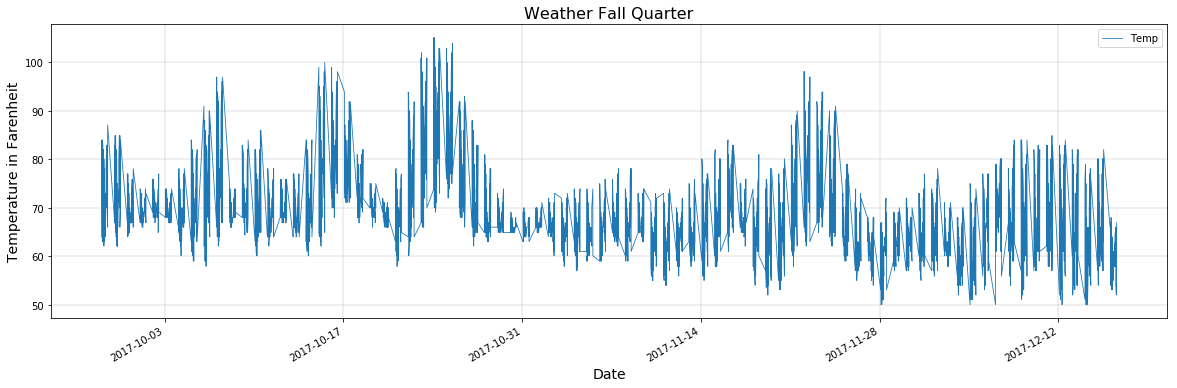

In [37]:
df_weather_2017.plot(linewidth=.8)
plt.title('Weather Fall Quarter',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Temperature in Farenheit', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)


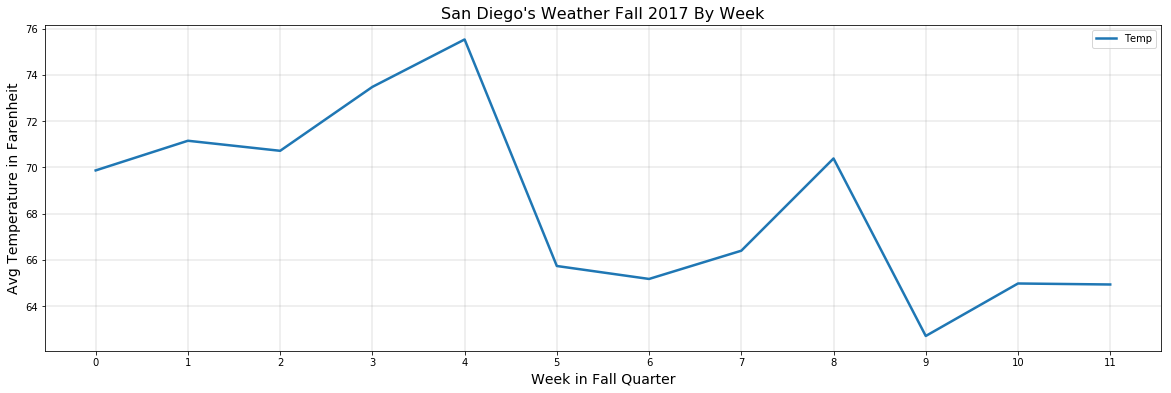

In [38]:
df_weather_week = df_weather_2017.resample('W').mean()
df_weather_week.index = [week for week in range(len(df_weather_week))]
ax = df_weather_week.plot(linewidth=2.5)
plt.xticks(df_weather_week.index)
_ = ax.set_title("San Diego's Weather Fall 2017 By Week", fontsize=16)
plt.xlabel('Week in Fall Quarter',fontsize=14)
plt.ylabel('Avg Temperature in Farenheit', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)


As we can see in this graph, in Fall Quarter there was a steep incline in temperature at week 4 with a peak of 76 degrees, then a steep drop to the mid 60s. Another peak to 70 degrees occurred week 8 with an even steeper drop to the low 60s toward week 9 before the temperature leveled off at the mid 60s again in weeks 10 and 11. 


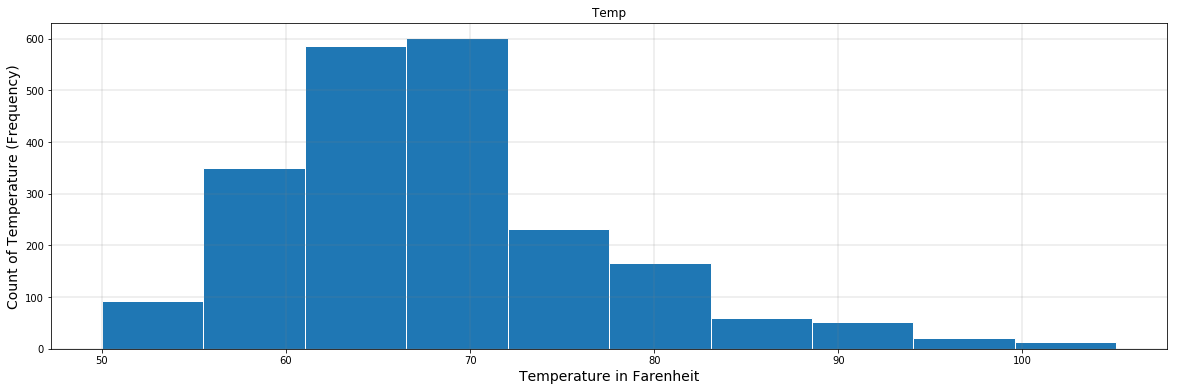

In [39]:
df_weather_2017.hist(edgecolor='white', linewidth=1)
_ = ax.set_title("Frequency of Temperatures", fontsize=16)
plt.xlabel('Temperature in Farenheit',fontsize=14)
plt.ylabel('Count of Temperature (Frequency)', fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.25)


Here we define frequency as the count of minutes during Fall 2017 corresponding to a specific temperature. So a frequency of 600 for 70 degrees Farenheit means that there were a total of 600 minutes in Fall during which it was 70 degrees. This histogram shows that there was a very normal Gaussian distribution for weather. The mean weather was 70 degrees with a small skew toward cooler temperatures 55 to 65 degrees.


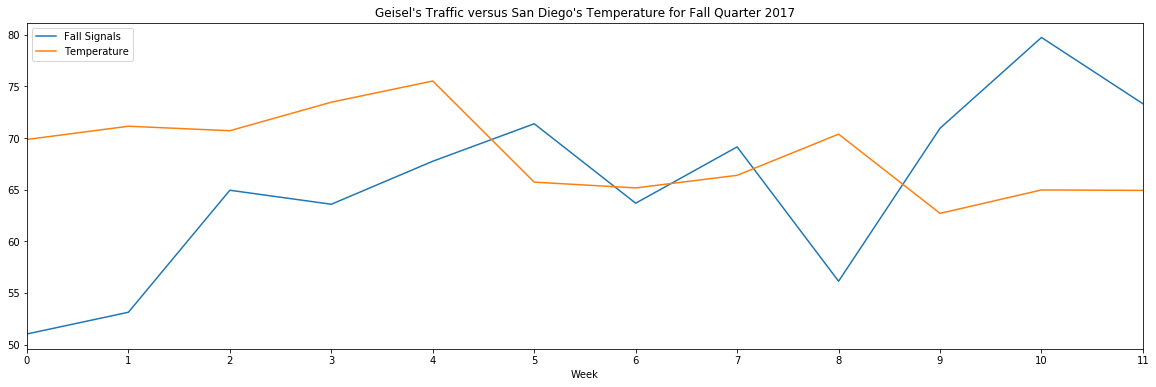

In [33]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

X = [week for week in range(len(df_weather_week))]
min_signals, max_signals = df_geisel_fall['Present_Signals'].min(), df_geisel_fall['Present_Signals'].max()
min_temp, max_temp = df_weather_2017['Temp'].min(), df_weather_2017['Temp'].max()
fall_weeks = list(df_week_fall['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_temp, max_temp)))
weather_weeks = list(df_weather_week['Temp'])
week_cmp_df = pd.DataFrame({'Fall Signals': fall_weeks, 'Temperature': weather_weeks}, index=X)
plt.figure(); ax = week_cmp_df.plot();
plt.xticks([week for week in range(12)]); ax.set_title("Geisel's Traffic versus San Diego's Temperature for Fall Quarter 2017");
plt.xlabel('Week');

There is no obvious trends between Geisel's signals and temperature.

#### Winter Quarter 2018

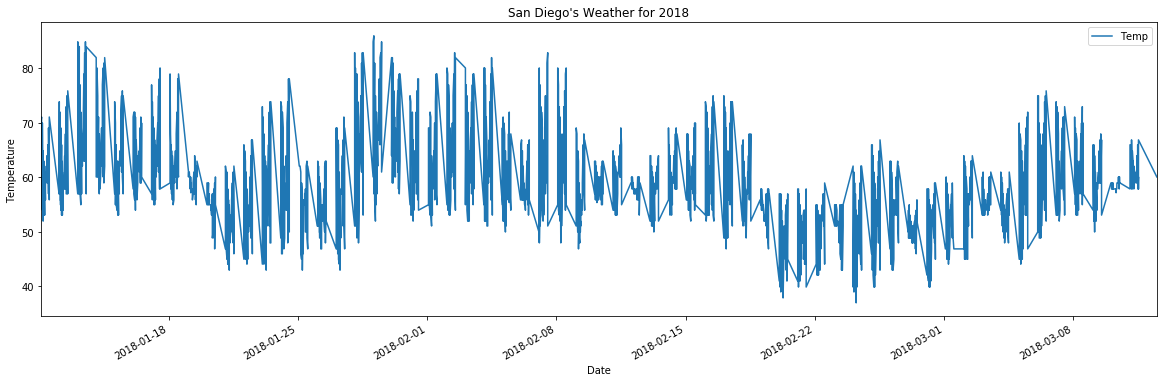

In [34]:
df_weather_2018.plot()
plt.title('San Diego\'s Weather for 2018'); plt.xlabel('Date'); plt.ylabel('Temperature');

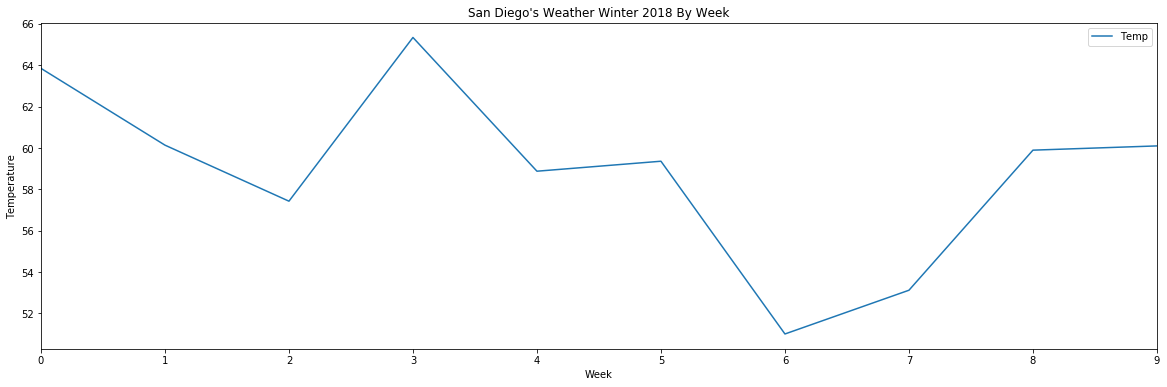

In [35]:
df_weather_week = df_weather_2018.resample('W').mean()
df_weather_week.index = [week for week in range(len(df_weather_week))]
ax = df_weather_week.plot()
plt.xticks(df_weather_week.index)
_ = ax.set_title("San Diego's Weather Winter 2018 By Week")
plt.xlabel('Week'); plt.ylabel('Temperature');

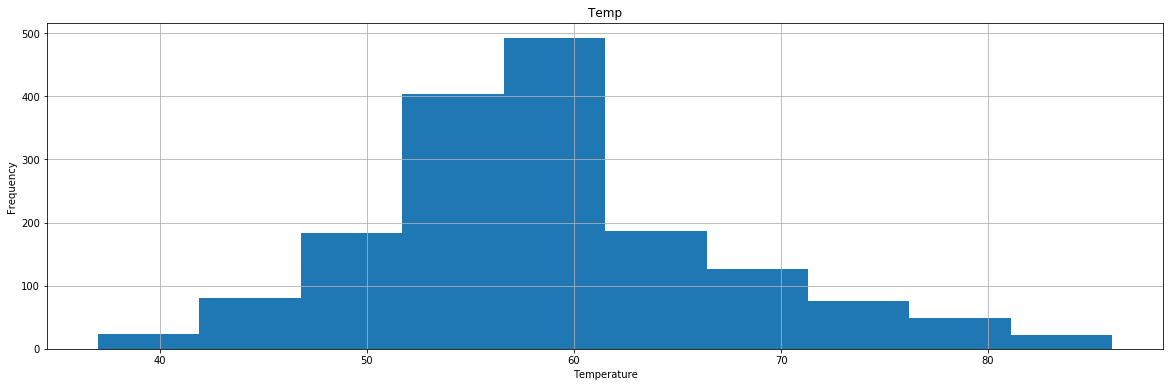

In [36]:
df_weather_2018.hist()
plt.xlabel('Temperature'); plt.ylabel('Frequency');

Here, we see that the temperature averages around 60 degrees for the winter quarter which is 10 degrees less than the fall quarter's temperature.

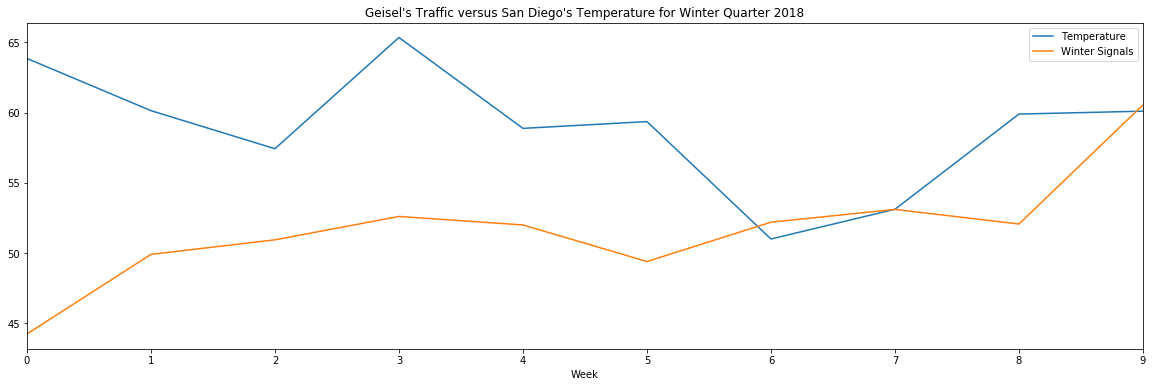

In [38]:
X = [week for week in range(len(df_weather_week))]
min_signals, max_signals = df_geisel_winter['Present_Signals'].min(), df_geisel_winter['Present_Signals'].max()
min_temp, max_temp = df_weather_2018['Temp'].min(), df_weather_2018['Temp'].max()
winter_weeks = list(df_week_winter['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_temp, max_temp)))
weather_weeks = list(df_weather_week['Temp'])
week_cmp_df = pd.DataFrame({'Winter Signals': winter_weeks, 'Temperature': weather_weeks}, index=X)
plt.figure(); ax = week_cmp_df.plot();
plt.xticks([week for week in range(10)]); ax.set_title("Geisel's Traffic versus San Diego's Temperature for Winter Quarter 2018");
plt.xlabel('Week');

There is no obvious trends between Geisel's signals and temperature.

### Shuttle

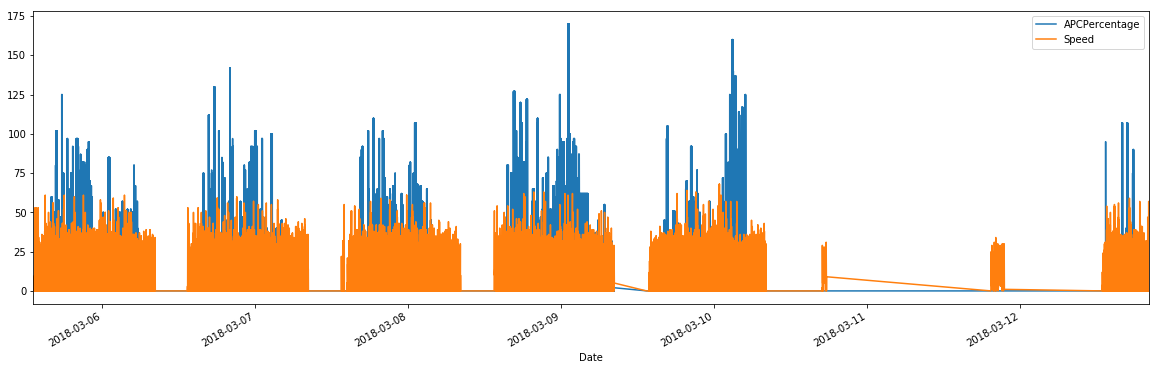

In [29]:
df_shuttle.plot()

Here we see that the shuttle is parked at night indicated by the horizontal lines at 0 and it starts getting people during normal service hours.

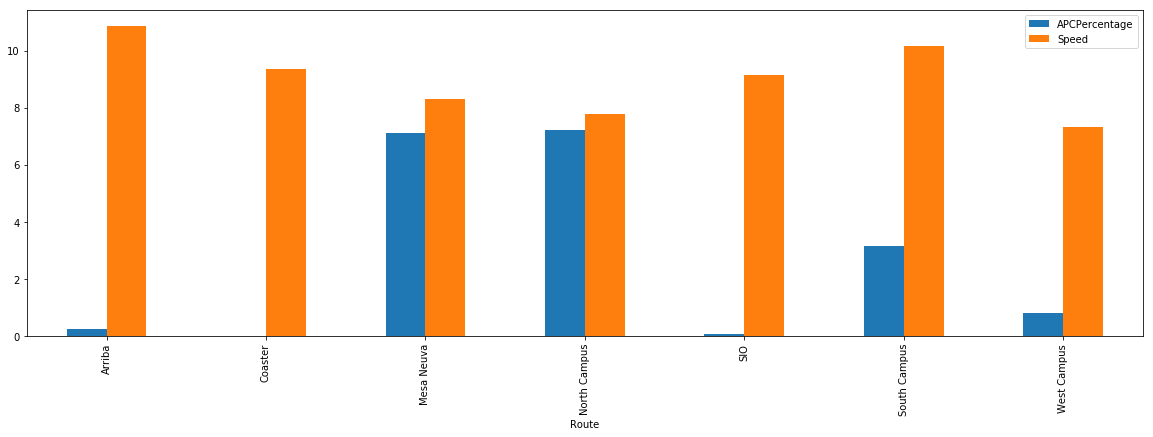

In [30]:
df_shuttle.groupby('Route').mean().plot(kind='bar')

This graph shows there Mesa Nueva and North Campus has the largest capacity ranking out of all the routes. We aso show that Coaster has few to no passengers for the week.

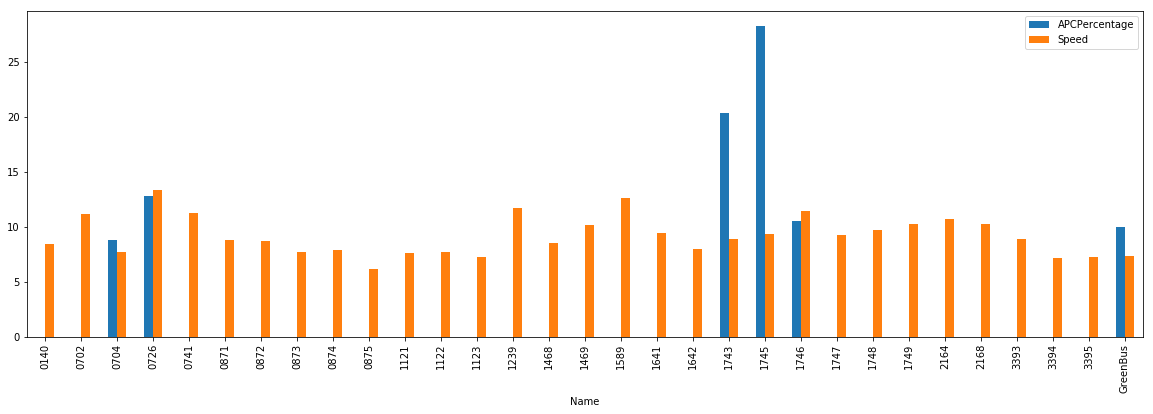

In [31]:
df_shuttle.groupby('Name').mean().plot(kind='bar')

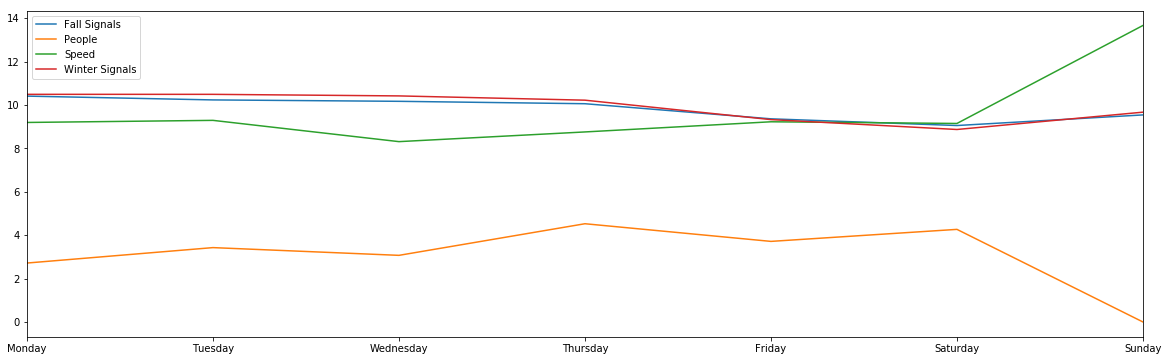

In [32]:
shuttle_weekday = df_shuttle.groupby(df_shuttle.index.weekday).mean()
fall_weekday = df_geisel_fall.groupby(df_geisel_fall.index.weekday).mean()
winter_weekday = df_geisel_winter.groupby(df_geisel_winter.index.weekday).mean()

min_signals, max_signals = df_geisel_fall['Present_Signals'].min(), df_geisel_fall['Present_Signals'].max()
min_speed, max_speed = shuttle_weekday['Speed'].min(), shuttle_weekday['Speed'].max()

weekday_cmp_df = pd.DataFrame({
    'Fall Signals': fall_weekday['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_speed, max_speed)),
    'Winter Signals': winter_weekday['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_speed, max_speed)),
    'Speed': shuttle_weekday['Speed'],
    'People': shuttle_weekday['APCPercentage']
})
plt.figure(); ax = weekday_cmp_df.plot(); ax.set_xticklabels(days_of_week);

# Data Analysis (Continue):

### Correlation Coefficient 

### Geisel vs. Weather

In [61]:
from scipy.stats import pearsonr

In [64]:
df_combine = df_weather_2017.resample('W').mean().join(df_geisel_fall.resample('W').mean())
df_combine

,Temp,Present_Signals
2017-10-01,69.864615,29.722403
2017-10-08,71.147594,90.934017
2017-10-15,70.712887,434.833520
2017-10-22,73.476882,395.340297
2017-10-29,75.528141,516.549648
2017-11-05,65.730769,622.222473
2017-11-12,65.170879,398.301541
2017-11-19,66.391979,557.020532
2017-11-26,70.381461,178.407091
2017-12-03,62.704615,609.572420


This data compares the temperature and present signals of every 7 days of the quarter (weekly).  

In [65]:
pearsonr(df_combine['Present_Signals'], df_combine['Temp'])

(-0.51637917554570045, 0.08565168025333636)

As shown above, there seems to be a negative correlation coefficient between the Present_Signals and Temperature. This means that, as the temperature increases, less people tend to stay in the library. Also, when the temperature gets colder, it would be likely that more people will be attending Geisel.

In [66]:
df_combine = df_weather_2018.resample('W').mean().join(df_geisel_winter.resample('W').mean())
df_combine

,Temp,Present_Signals
2018-01-14,63.850926,243.774786
2018-01-21,60.137624,428.837800
2018-01-28,57.427011,462.659125
2018-02-04,65.344910,517.002807
2018-02-11,58.876856,497.246050
2018-02-18,59.359259,412.245477
2018-02-25,51.004678,503.636590
2018-03-04,53.120103,533.384332
2018-03-11,59.894737,499.438835
2018-03-18,60.100000,776.232510


In [67]:
pearsonr(df_combine['Present_Signals'], df_combine['Temp'])

(-0.21902227203317756, 0.54321814623032805)

### Geisel vs. Schedule Data 

In [1]:
import pandas as pd
from datetime import datetime
from scipy.stats import pearsonr

df_geisel_monday = pd.read_csv("data/geisel_monday_average_2017.csv")
df_schedule_monday = pd.read_csv("data/monday_class_schedule.csv")

pearsonr(df_geisel_monday["Present_Signals"], df_schedule_monday["Number_of_People"])

(0.8092616386522097, 4.895925668108242e-68)

As shown above, there is a strong positive correlation coefficient between the number of people in geisel and the number of people in class. From this, we can infer that when there are people leaving class, there are probably people leaving Geisel to go to their next section of class. 

### Geisel vs. Shuttle Data

In [4]:
import pandas as pd
from datetime import datetime
from scipy.stats import pearsonr

df_geisel = pd.read_csv('data/geisel_Winter2018.csv')
df_geisel.index = pd.to_datetime(df_geisel['Time_Stamp'])
df_geisel = df_geisel['Present_Signals']
df_geisel.tail(10)
df_combine = df_shuttle.resample('T').mean().join(df_geisel.resample('T').mean())
df_combine = df_combine.dropna()
df_combine

pearsonr(df_combine["Present_Signals"], df_combine["APCPercentage"])

(-0.038639736045646786, 0.013203161544640688)

There seems to be no relationship between the number of people in geisel and the number of people at the shuttle.

## Prediction

We will predict the traffic in Geisel using previous Geisel's traffic based solely on previous time stamps. We will use mean squared error as an indicator for how well we are doing with predictions. The two models we will use for univariate time series prediction (forecasting) are Persistence Forecast Model and Autoregressive Forecast Model.

In [100]:
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from math import sqrt

### Persistence Forecast Model

The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the next time step (t+1).

We will use this as one of our forecast performance baseline as this model will be used to compare with how well every other model will do. The performance measure we intend to use to evaluate forecasts is mean squared error.

In [78]:
# Split into train and test sets

# Dataframe.values returns the numpy representation of NDFrame.
Y = df_geisel_winter["Present_Signals"].values

# train has the first 66% of the data and test has the rest
train_size = int(len(Y) * 0.66)
train, test = Y[1:train_size], Y[train_size:]

#### Walk forward validation

The automatic Walk forward test is a system design and validation technique in which you optimize the parameter values on a past segment of market data (”in-sample”), then verify the performance of the system by testing it forward in time on data following the optimization segment (”out-of-sample”). 

In [106]:
predictions = []
history = list(train[:])
index = 0

for observation in test:
    # Uses the value at the previous time step (t-1) for prediction
    prediction = history[-1]
    
    if index < 100:
        print('Predicted=%.3f, Expected=%3.f' % (prediction, observation))
        index = index + 1
    
    predictions.append(prediction)
    # Add observation to history to be use for the next time step
    history.append(observation)
    
mse = mean_squared_error(test, predictions)
print('MSE=%.3f RMSE=%.3f' % (mse, sqrt(mse)))

Predicted=638.000, Expected=645
Predicted=645.000, Expected=643
Predicted=643.000, Expected=658
Predicted=658.000, Expected=654
Predicted=654.000, Expected=673
Predicted=673.000, Expected=676
Predicted=676.000, Expected=668
Predicted=668.000, Expected=658
Predicted=658.000, Expected=654
Predicted=654.000, Expected=635
Predicted=635.000, Expected=656
Predicted=656.000, Expected=663
Predicted=663.000, Expected=679
Predicted=679.000, Expected=689
Predicted=689.000, Expected=700
Predicted=700.000, Expected=679
Predicted=679.000, Expected=680
Predicted=680.000, Expected=691
Predicted=691.000, Expected=695
Predicted=695.000, Expected=700
Predicted=700.000, Expected=702
Predicted=702.000, Expected=682
Predicted=682.000, Expected=691
Predicted=691.000, Expected=684
Predicted=684.000, Expected=688
Predicted=688.000, Expected=680
Predicted=680.000, Expected=690
Predicted=690.000, Expected=723
Predicted=723.000, Expected=842
Predicted=842.000, Expected=718
Predicted=718.000, Expected=730
Predicte

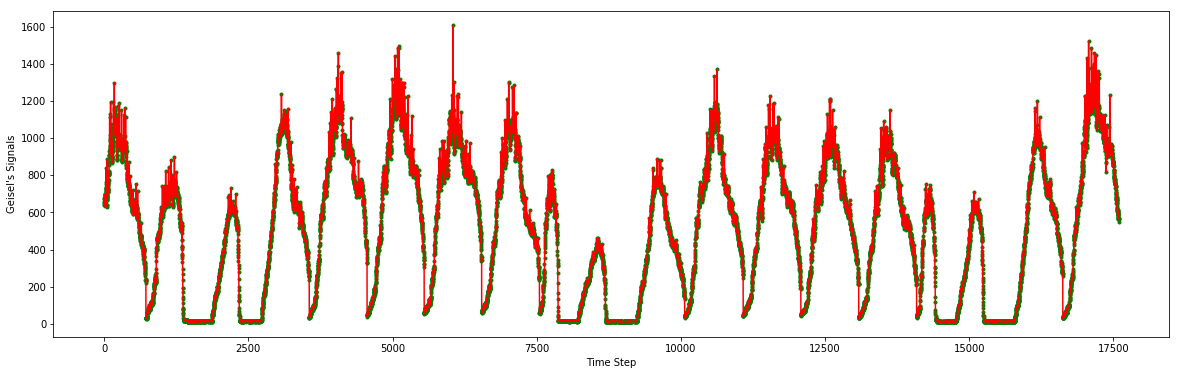

In [87]:
# plot predictions and expected results
plt.plot(test, 'g.')
plt.plot(predictions, 'r-')
plt.ylabel("Geisel's Signals"); plt.xlabel("Time Step");

### Autoregressive Forecast Model

The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic/random term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation (recurrence relation).

An autoregressive model is when a value from a time series is regressed on previous values from that same time series.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

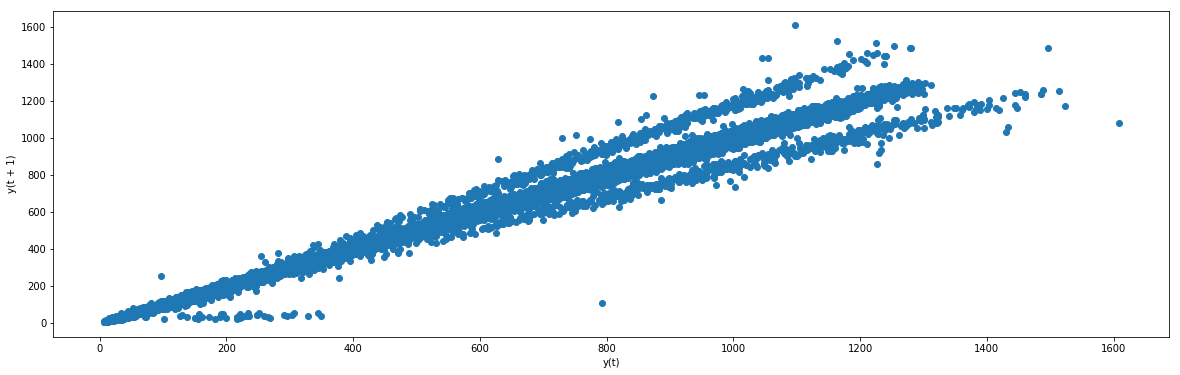

In [89]:
pd.plotting.lag_plot(df_geisel_winter)

Pearson correlation coefficient produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high values above 0.5 or below -0.5 showing high correlation.

In [91]:
# Create a lagged dataset
signals = df_geisel_winter["Present_Signals"]
df_lagged = pd.concat([signals.shift(1), signals], axis=1)
df_lagged.columns = ["t-1", "t+1"]
df_lagged.head()

,t-1,t+1
Time_Stamp,,
2018-01-10 13:39:00,NaN,773
2018-01-11 14:09:00,773.0,782
2018-01-11 14:12:00,782.0,787
2018-01-11 14:14:00,787.0,799
2018-01-11 14:16:00,799.0,794


In [92]:
df_lagged.corr()

,t-1,t+1
t-1,1.000000,0.996872
t+1,0.996872,1.000000


It shows a strong positive correlation (0.99) between the observation and the lag=1 value.

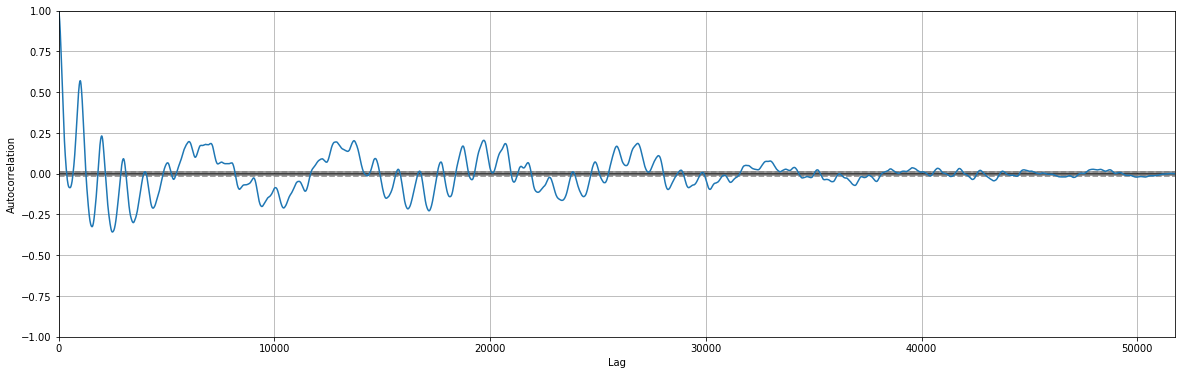

In [94]:
# For each lag variable (t-x) where x is the amount of lag, calculate and plot the correlation coefficient
# Solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values
pd.plotting.autocorrelation_plot(df_geisel_winter)

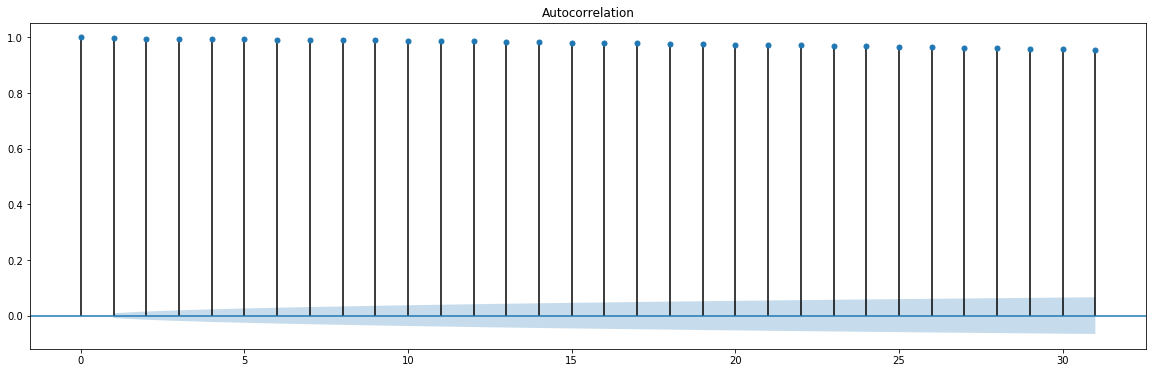

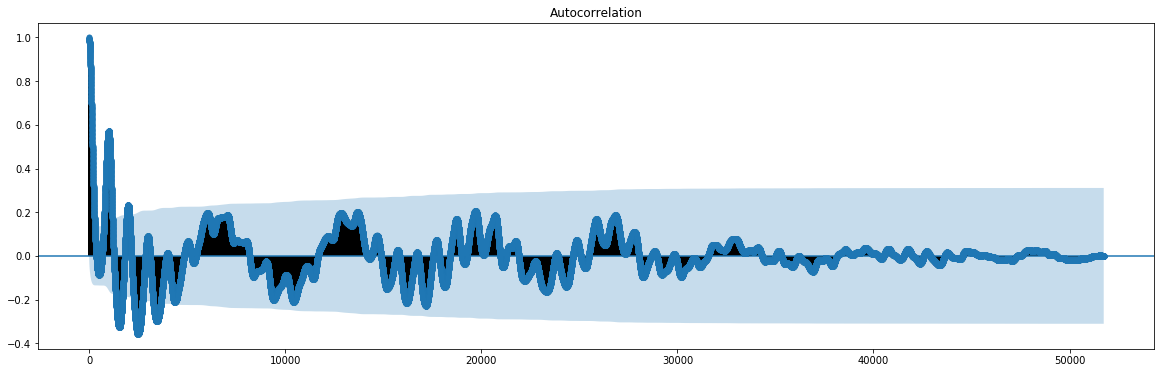

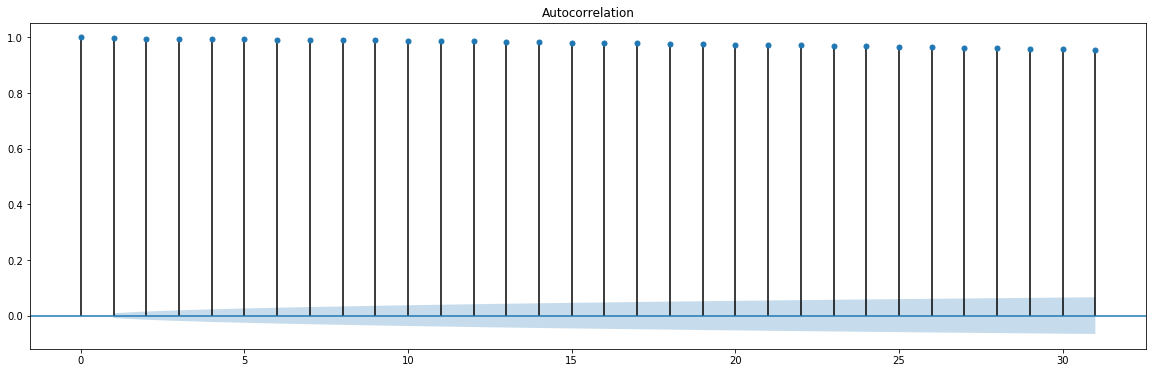

In [98]:
# Same thing as above graphing autocorrelation but we limit the lags to 31 for visibility
plot_acf(df_geisel_winter)
plot_acf(df_geisel_winter, lags=31)

In [101]:
# train autoregression
train_size = int(len(Y) * 0.66)
train, test = Y[1:train_size], Y[train_size:]
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
# Lag coefficients are the weightings on those lag observations.
coef = model_fit.params
print('Lag: %s' % window)
print('Coefficients: %s' % coef)

Lag: 52
Coefficients: [  1.40111141e+00   5.75710178e-01   2.42716609e-01   1.19075350e-01
   5.48153243e-02   5.13988182e-02  -3.71702432e-03   2.59217898e-03
  -1.27791378e-02  -5.24839851e-03  -8.53116331e-03   7.18985373e-03
  -7.55038338e-03  -2.61101270e-03   1.53246403e-03   1.15654431e-02
   1.73862285e-03  -6.45434144e-03  -2.69807329e-02   2.53968768e-03
   2.26866052e-03   1.32302830e-02  -1.63119846e-02  -1.19791239e-03
  -3.29134084e-03   1.78836663e-02   1.87506983e-03   5.45283465e-03
   1.60734901e-02   1.19214325e-02   2.58106783e-03  -9.75551004e-03
  -1.33632732e-02  -2.20247248e-03  -1.39195938e-02  -9.87381479e-03
  -6.45644307e-03  -6.28151743e-03   6.04022641e-03  -4.83053943e-04
   1.45587103e-02   6.86469789e-03   8.62966309e-03  -6.68613867e-03
   2.13502317e-03   7.29903211e-03  -4.89787750e-03  -6.13874932e-03
   2.99377592e-03  -1.14401935e-02   5.25398392e-03   4.63506875e-03
  -1.74154330e-02]


In [107]:
# walk forward over time steps in test
history = train[len(train)-window:].tolist()
predictions = []
index = 0
for t in range(len(test)):
    his_len = len(history)
    lag = [history[i] for i in range(his_len-window,his_len)]
    prediction = coef[0]
    
    # use the learned coefficients and manually make predictions to update the model as new observations become available
    for d in range(window):
        prediction += coef[d+1] * lag[window-d-1]
    observation = test[t]
    
    predictions.append(prediction)
    history.append(observation)
    
    if index < 100:
        print('predicted=%f, expected=%f' % (prediction, observation))
        index = index + 1
    
error = mean_squared_error(test, predictions)
print('Test MSE=%.3f RMSE=%.3f' % (error, sqrt(error)))

predicted=642.699519, expected=645.000000
predicted=647.730904, expected=643.000000
predicted=645.277014, expected=658.000000
predicted=653.907741, expected=654.000000
predicted=655.707422, expected=673.000000
predicted=669.652795, expected=676.000000
predicted=673.920864, expected=668.000000
predicted=671.938790, expected=658.000000
predicted=662.087973, expected=654.000000
predicted=662.473612, expected=635.000000
predicted=650.383508, expected=656.000000
predicted=656.009908, expected=663.000000
predicted=657.512915, expected=679.000000
predicted=671.485090, expected=689.000000
predicted=681.484615, expected=700.000000
predicted=697.674317, expected=679.000000
predicted=688.951717, expected=680.000000
predicted=685.501952, expected=691.000000
predicted=692.853653, expected=695.000000
predicted=697.917170, expected=700.000000
predicted=700.077506, expected=702.000000
predicted=702.546261, expected=682.000000
predicted=691.545208, expected=691.000000
predicted=694.305188, expected=684

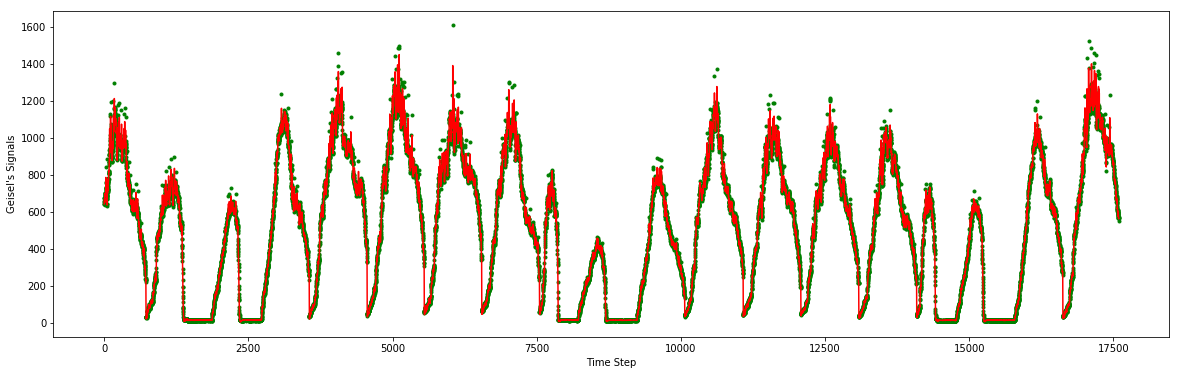

In [105]:
# plot results
plt.plot(test, 'g.')
plt.plot(predictions, 'r-')
plt.ylabel("Geisel's Signals"); plt.xlabel("Time Step");

# Ethics and Privacy

Waitz gave us permission to access the data on how populated Geisel is. For the purpose of the final project, Waitz gave us the opportunity to work with their company as interns to use their information for analysis purposes. The documents are PROPRIETARY INFORMATION AND INVENTION ASSIGNMENT AGREEMENT (PIAA) and INTERN OFFER letter.

For the weather data, this data is public information and is available to everyone.

The shuttle data was scraped through the UCSD live map site, which is available online. For individual privacy, this information does not disclose who is on the bus. It only reveals the capacity rate of the shuttle at a given time.

And for the scheduling dataset, the information was scraped from the UCSD course schedule website. Since this website measured the number of students taking classes at a certain period of time, the data will be fairly accurate. 
There is no specific information on individual taking any courses. This data only measures the number of people in a course.

### Bias

**Waitz Dataset**

There is bias towards the location of the hardware hubs and towards students with electronics with built-in Bluetooth capabilities. Placing hubs at certain locations of the library may not receive signals from students at other parts of the library. And since there are students without a built-in Bluetooth towards their electronic devices, this may cause an underestimate. Likewise, there may be an overestimate if there are students with multiple Bluetooth devices.

**Weather Dataset**

For the weather data, there doesn't seem to be any biases in this data set because temperature is typically recorded accurately. 

**Schedule Dataset**

In terms of the class time, there will be a bias towards students who don't attend class. Because of this, there may be an overestimate on the number of people that probably have to leave for class during a period of time. Also, this data doesn't measure the number of students during finals week.

**Shuttle Dataset**

For this dataset, bias is very unlikely in the shuttle data because of the constant updates from the drivers and equipment inside the busses. Because of this, it also constantly measures the speed of the shuttle and the drivers count the number of people at the bus at a certain period of time. Also, we only retrieved about 1 week worth of data for this dataset, which may be lacking compared to the our other dataset (even we have 70000 dataset).

# Conclusion

From the data that was received, we have concluded on making the prediction model between the number of people at Geisel, the weather data, and the schedule data. The shuttle data was not placed into our prediction model because of its low relationship with the Geisel data (which had a rough correlation coefficient of -0.0386). From this, we were able to construct a prediction model. 


**Explain how the prediction model, once it has been built**

One pitfalls that have affected our interpretation of our data would be the different quarters for the weather data. In this case, the temperature in winter is generally lower than the temperature during the Spring time. However, the number of people in Geisel between both quarters are relatively the same. Because of this, our interpretation may cause us to believe that warmer weather has more people, if we use the data from Fall. 

Another pitfall would be how Fall quarter's signal may be larger than the actual value. We were warned that the the Fall quarter's data may overestimate the number of people because the 6th floor overcounted. This mat cause us to believe that there may have been a large number of people at Geisel at certain periods of the day, causing a slight skew in our data.



# Discussion

Answering our research, we were able to predict the traffic in Geisel Library using the data encompassing weather, schedule, and traffic. However, for the shuttle data, we discovered that there was very little correlation between the number of people in the shuttles nad the number of people at Geisel. Hence, we based our prediction model on timing of the number of people at a given time. From this, we were able to make a rough estimate on the number of people at Geisel. 

For our hypothesis, we were partly correct. The shuttle data didn't affect the number of people in Geisel, but the class schedule and weather data did. We did not get the data for the timing of exams. However, we made a qualitative observation that midterms occurred during week 4, 6, and 8, including finals that occurs after week 11. However, we did not factor this into our final prediction model. Hence, our prediction model only includes one data sets for us to be able to predict the number of people in Gesiel. We had difficulties make a prediction models from multiple variables. 

To be able to retreive our data, we scraped the shuttle data from the UCSD shuttle website, the enrollment number of students in classes via the school's schedule websites, retrieved the signal data from the company Waitz, and scraped the weather data from the city of San Diego Montgomery. Then after we scraped the data, we had to clean the data into the format that would be useful for us (mainly making the data as time series). This process took roughly week 2 to week 6 to scrape and clean all the datasets. 
         
Once the dataset was cleaned, we visualized the data for analysis. First, we visualized the number of Signals in Geisel through the Winter 2018 and Fall 2017. From this, we see that the two quarters were roughly similar, with a spike on the number of Signals in Geisel at week 4,5,6, and 10. We then visualized the data throughout the week, discovering the Friday and Saturday were the emptiest. 

We then visualized the Schedule data, and projected both the schedule data agains the Geisel data to discover any trends. We saw that there was an approximate trend between the two datasets. 
Afterwards, we made a trend of the Geisel data with the Weather and it didn't seem that there was any relationship between the two datasets.
Lastly, we visualized the shuttle data and projected it against the Geisel data, and there didn't seem to be any relationship.

For each of these relationship, we ran Pearsonr to determine the correlation coefficient between the datasets. Schedule and Geisel signals had a strong correlation coefficient of roughly .80, which showed a positive relationship.  Weather and Geisel signals had an average correlation coefficient of roughly -.50, which showed an inverse relationship. Lastly, Shuttle and Geisel signals had  correlation coefficient of .032, which showed roughly no relationship between the two datasets.

Our final results from this project was being able to make a small predictive model. This predictive model only uses the Geisel data as a way to make the prediction. We could not find a good enough multivariate model based on weather and schedule data that has a better mean squared error than the univariate predictive model based on Geisel's past time stamps. In addition, we try to attempt possibly better models but they take up too much computing power.

The next steps for prediction is coming up with better models such as using the ARIMA model for a single variable based on time or using vector auto regression if using multiple variables to predict. Furthermore, you can use Facebook's library for time series prediction called [Prophet](https://facebook.github.io/prophet/).
